# Scenario/Robustness analysis

In [1]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
from collections import defaultdict
from tqdm import tqdm
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import dimensional_stacking
import importlib
import warnings
warnings.filterwarnings(action='once')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [2]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
import plotter

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12

Read the results of the open exploration:

In [3]:
experiments = pd.read_csv("../outputs/experiments_exploration.csv").drop(
    columns="Unnamed: 0"
)
outcomes = pd.read_csv("../outputs/outcomes_exploration.csv").drop(columns="Unnamed: 0")

In [4]:
policy_name_conversion = {"best_egypt_aggregate": "Best Egypt Irr.", "best_egypt_90": "Best Egypt 90$^{th}$",
                          "best_egypt_HAD": "Best Egypt HAD", "best_ethiopia":"Best Ethiopia Hydropower",
                          "compromise_percentile": "Compromise: Percentile", "compromise_threshold":"Compromise: Absolute"}
for i in tqdm(experiments.index):
    experiments.loc[i,"policy"] = policy_name_conversion[experiments.loc[i,"policy"]]

outcomes["policy"] = experiments["policy"]
outcomes["scenario"] = experiments["scenario"]

100%|██████████| 30000/30000 [00:15<00:00, 1927.35it/s]


In [5]:
experiments

atbara_dev_coef  atbara_mean_coef  blue_nile_dev_coef  \
0             1.471380          0.800738            1.386853   
1             0.569234          1.031349            0.655280   
2             0.632213          0.788649            1.299785   
3             1.197767          0.976064            1.470813   
4             0.570210          1.210193            0.662523   
...                ...               ...                 ...   
29995         1.308495          0.931921            1.338154   
29996         1.456176          1.050605            1.037758   
29997         1.257144          1.121553            0.544593   
29998         0.919233          1.152845            0.705375   
29999         1.303976          1.066538            0.977204   

       blue_nile_mean_coef  white_nile_dev_coef  white_nile_mean_coef  \
0                 1.105452             1.016471              0.982653   
1                 0.942534             0.588134              0.873701   
2                 1.236697             1.343692              1.218914   
3                 1.170307             1.288438              1.199654   
4                 0.960108             1.254217              1.052744   
...                    ...                  ...                   ...   
29995             0.962601             1.121466              1.044193   
29996             1.080653             0.960639              1.081646   
29997             0.969784             1.314685              0.759204   
29998             0.966616             1.164065              1.080812   
29999             0.787624             0.728672              0.895816   

       yearly_demand_growth_rate        v0        v1        v2  ...      v157  \
0                       0.024671  0.027675  0.431101  0.386805  ...  0.216790   
1                       0.023330  0.027675  0.431101  0.386805  ...  0.216790   
2                       0.019643  0.027675  0.431101  0.386805  ...  0.216790   
3                       0.011049  0.027675  0.431101  0.386805  ...  0.216790   
4                       0.023226  0.027675  0.431101  0.386805  ...  0.216790   
...                          ...       ...       ...       ...  ...       ...   
29995                   0.017518  0.042220  0.469741  0.426929  ...  0.238765   
29996                   0.018508  0.042220  0.469741  0.426929  ...  0.238765   
29997                   0.020098  0.042220  0.469741  0.426929  ...  0.238765   
29998                   0.016320  0.042220  0.469741  0.426929  ...  0.238765   
29999                   0.018648  0.042220  0.469741  0.426929  ...  0.238765   

           v158      v159      v160      v161      v162      v163  scenario  \
0     -0.719823  0.868430  0.950715  0.046718  0.691930  0.988440         0   
1     -0.719823  0.868430  0.950715  0.046718  0.691930  0.988440         1   
2     -0.719823  0.868430  0.950715  0.046718  0.691930  0.988440         2   
3     -0.719823  0.868430  0.950715  0.046718  0.691930  0.988440         3   
4     -0.719823  0.868430  0.950715  0.046718  0.691930  0.988440         4   
...         ...       ...       ...       ...       ...       ...       ...   
29995 -0.718833  0.873723  0.933073  0.055896  0.709431  0.997992      4995   
29996 -0.718833  0.873723  0.933073  0.055896  0.709431  0.997992      4996   
29997 -0.718833  0.873723  0.933073  0.055896  0.709431  0.997992      4997   
29998 -0.718833  0.873723  0.933073  0.055896  0.709431  0.997992      4998   
29999 -0.718833  0.873723  0.933073  0.055896  0.709431  0.997992      4999   

                     policy        model  
0           Best Egypt Irr.  NileProblem  
1           Best Egypt Irr.  NileProblem  
2           Best Egypt Irr.  NileProblem  
3           Best Egypt Irr.  NileProblem  
4           Best Egypt Irr.  NileProblem  
...                     ...          ...  
29995  Compromise: Absolute  NileProblem  
29996  Compromise: Absolute  NileProblem  
29997  Compromise: Absolute  NileProblem  
29998  Co

In [6]:
outcomes.describe()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/nanops.py:1723: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=1, interpolation=interpolation)


egypt_irr      egypt_90  egypt_low_had     sudan_irr      sudan_90  \
count  30000.000000  30000.000000   30000.000000  30000.000000  30000.000000   
mean       6.389825      1.740918       0.183919      0.044791      0.000488   
std        4.979955      1.213819       0.253528      0.085948      0.005531   
min        0.003427      0.000000       0.000000      0.000000      0.000000   
25%        2.216116      0.747158       0.000000      0.000000      0.000000   
50%        5.304862      1.633413       0.008333      0.001460      0.000000   
75%        9.578601      2.575240       0.329167      0.048676      0.000000   
max       28.569848      6.547417       0.875000      0.645968      0.133038   

       ethiopia_hydro      scenario  
count    30000.000000  30000.000000  
mean        10.965865   2499.500000  
std          3.249285   1443.399701  
min          4.580897      0.000000  
25%          8.396527   1249.750000  
50%         10.718704   2499.500000  
75%         13.638551   3749.250000  
max         17.515071   4999.000000

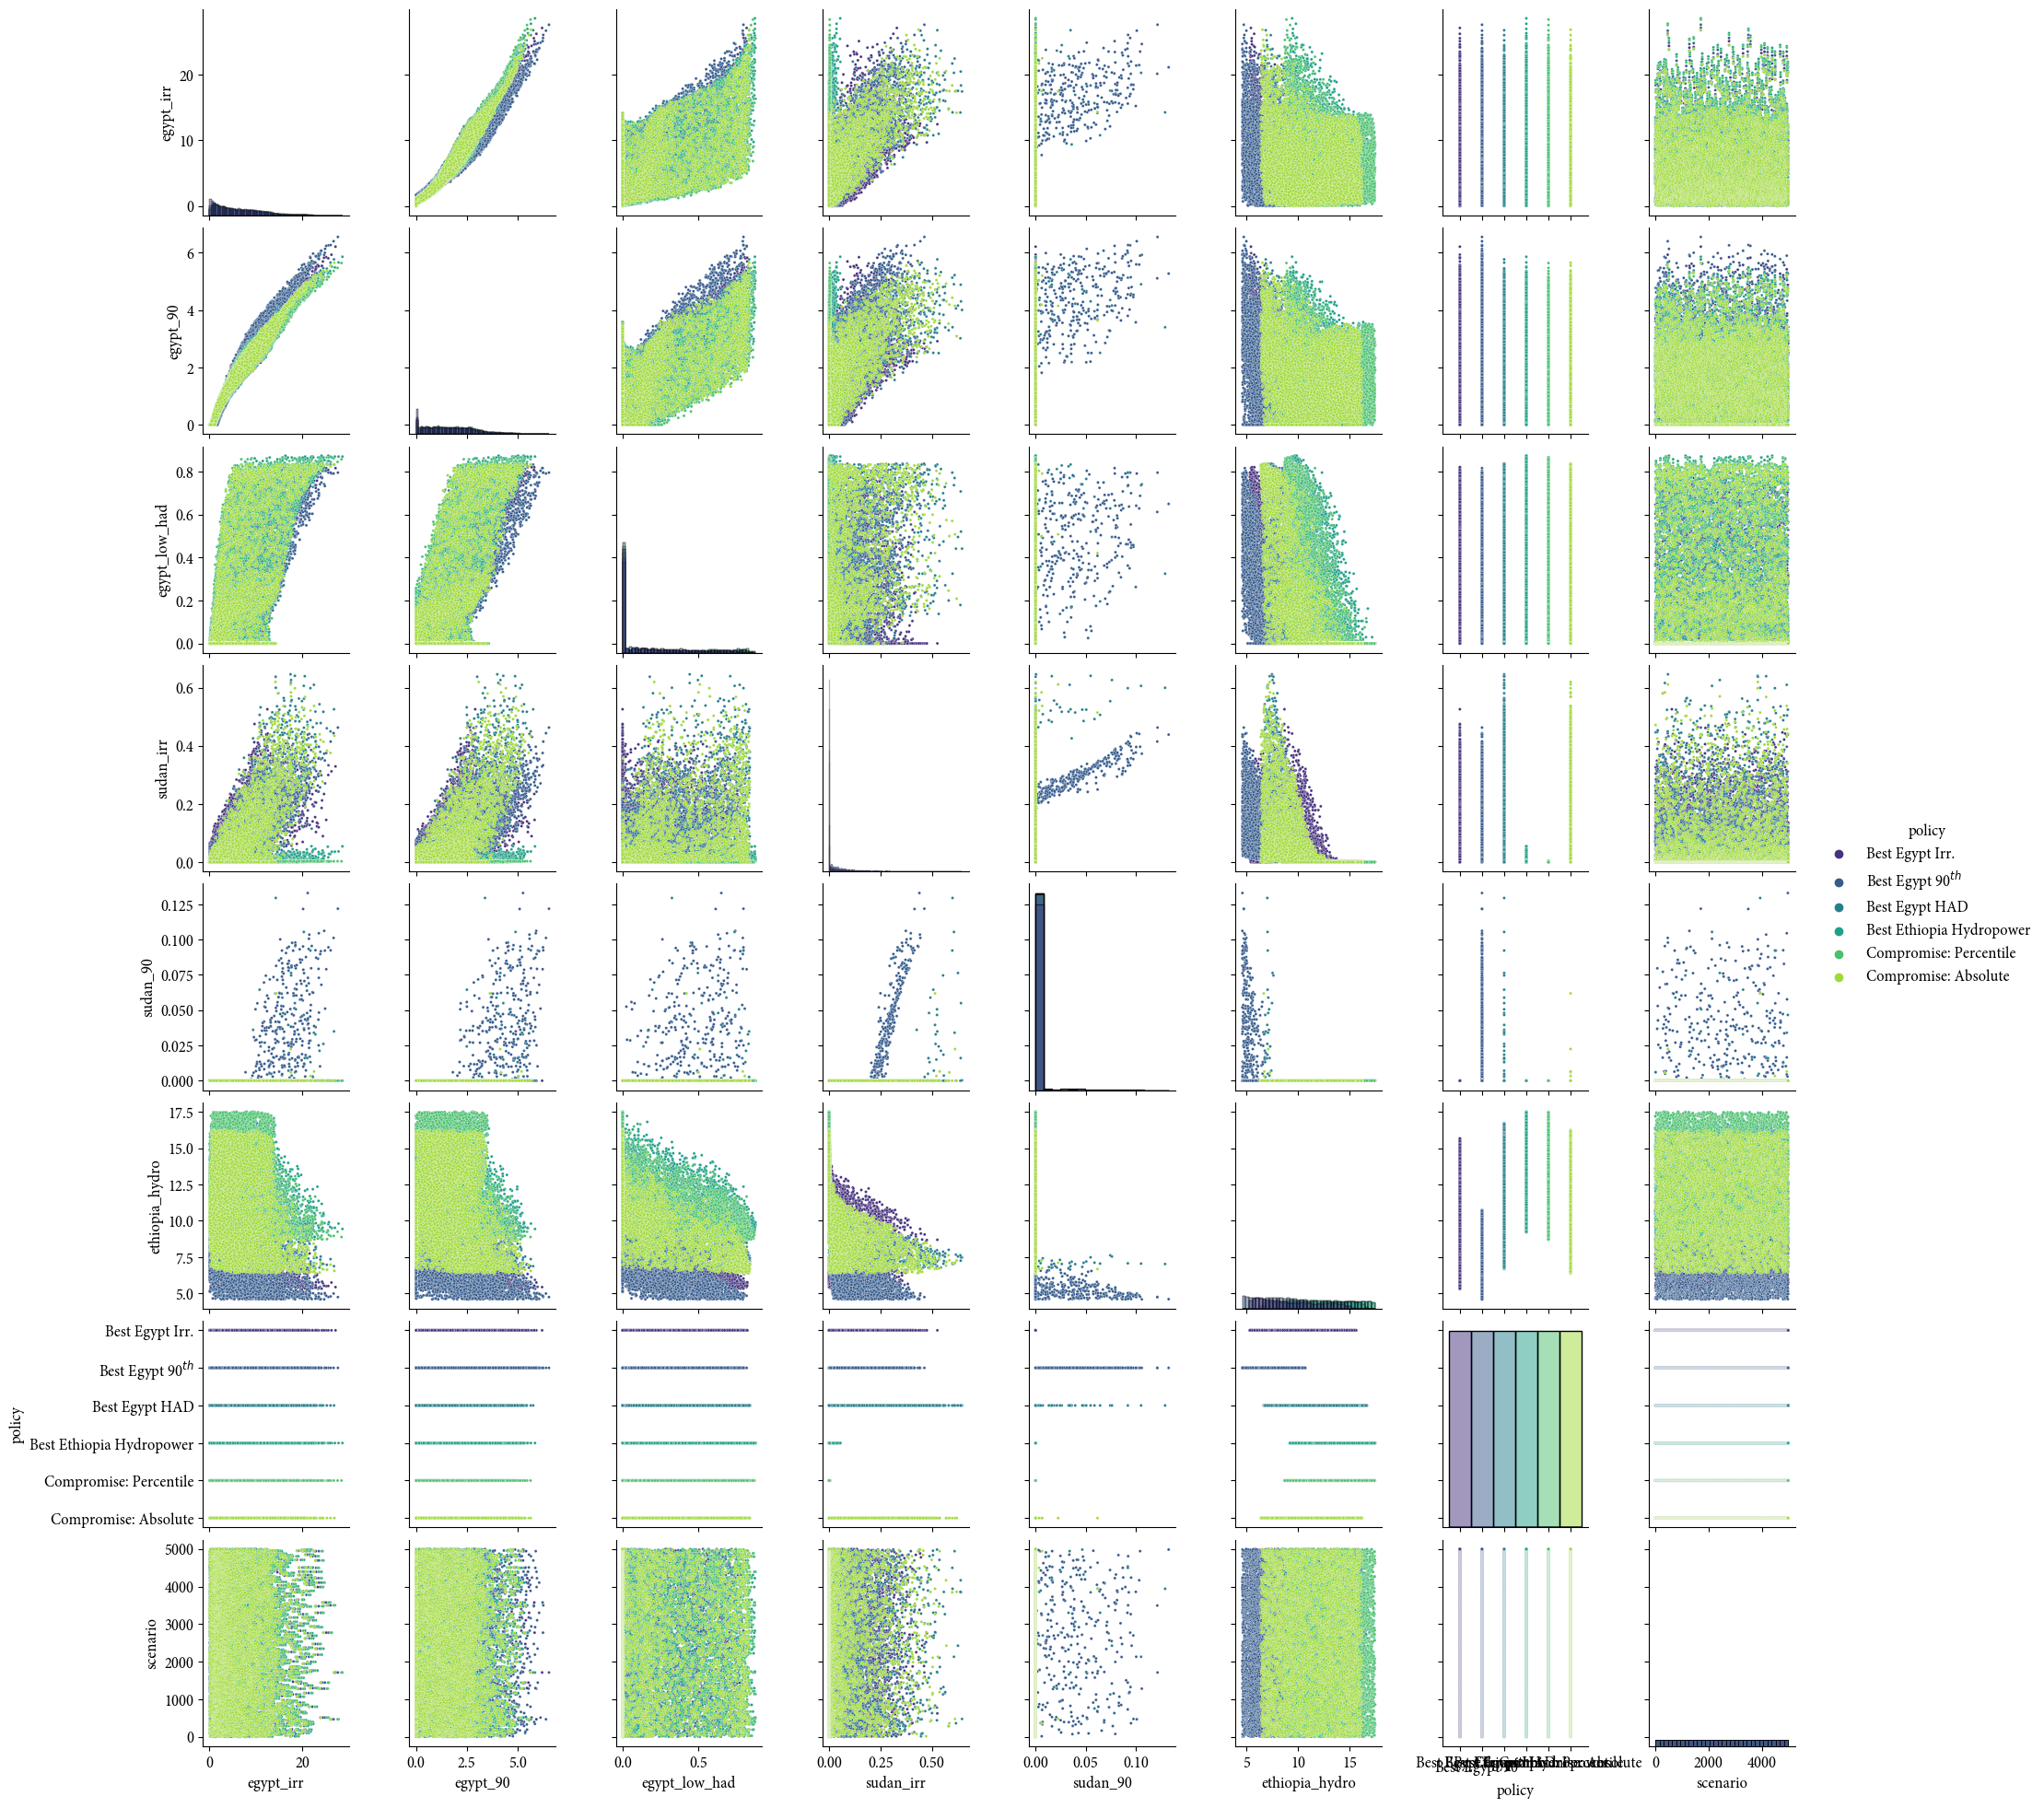

In [7]:
# Let's see all objectives against one another, policies color-coded:
sns.pairplot(
    outcomes,
    hue="policy",
    vars=outcomes.keys(),
    diag_kind="hist",
    plot_kws={"s": 5},
    palette="viridis",
)
plt.xticks(rotation=45)
plt.show()

## Percentile compromise seems to be performing very well even in terms of Ethiopia Hydropower almost as good as the best Ethiopia policy. Check if they perform the same in all scenarios, or in certain scenarios compromise is better or vice versa!

In [8]:
# All the factors for global sensitivity analysis in the same dataframe:
experiments.iloc[:, [0, 1, 2, 3, 4, 5, 6, -2]]

atbara_dev_coef  atbara_mean_coef  blue_nile_dev_coef  \
0             1.471380          0.800738            1.386853   
1             0.569234          1.031349            0.655280   
2             0.632213          0.788649            1.299785   
3             1.197767          0.976064            1.470813   
4             0.570210          1.210193            0.662523   
...                ...               ...                 ...   
29995         1.308495          0.931921            1.338154   
29996         1.456176          1.050605            1.037758   
29997         1.257144          1.121553            0.544593   
29998         0.919233          1.152845            0.705375   
29999         1.303976          1.066538            0.977204   

       blue_nile_mean_coef  white_nile_dev_coef  white_nile_mean_coef  \
0                 1.105452             1.016471              0.982653   
1                 0.942534             0.588134              0.873701   
2                 1.236697             1.343692              1.218914   
3                 1.170307             1.288438              1.199654   
4                 0.960108             1.254217              1.052744   
...                    ...                  ...                   ...   
29995             0.962601             1.121466              1.044193   
29996             1.080653             0.960639              1.081646   
29997             0.969784             1.314685              0.759204   
29998             0.966616             1.164065              1.080812   
29999             0.787624             0.728672              0.895816   

       yearly_demand_growth_rate                policy  
0                       0.024671       Best Egypt Irr.  
1                       0.023330       Best Egypt Irr.  
2                       0.019643       Best Egypt Irr.  
3                       0.011049       Best Egypt Irr.  
4                       0.023226       Best Egypt Irr.  
...                          ...                   ...  
29995                   0.017518  Compromise: Absolute  
29996                   0.018508  Compromise: Absolute  
29997                   0.020098  Compromise: Absolute  
29998                   0.016320  Compromise: Absolute  
29999                   0.018648  Compromise: Absolute  

[30000 rows x 8 columns]

In [9]:
# OOIs must be prepared as a dict with name in key and np arrays in value for the feature scoring:

out_dict = dict()
for col in outcomes.iloc[:, :-2].columns:
    out_dict[col] = np.array(outcomes[col])
out_dict

{'egypt_irr': array([6.52705659, 8.76670943, 3.38922539, ..., 6.23265277, 2.3227058 ,
        8.38865557]),
 'egypt_90': array([1.74252637, 2.33305574, 1.30553512, ..., 1.7320025 , 0.92099161,
        2.59460191]),
 'egypt_low_had': array([0.        , 0.3625    , 0.        , ..., 0.30416667, 0.        ,
        0.67083333]),
 'sudan_irr': array([0.12474788, 0.10437194, 0.        , ..., 0.0454802 , 0.        ,
        0.09520356]),
 'sudan_90': array([0., 0., 0., ..., 0., 0., 0.]),
 'ethiopia_hydro': array([10.72416017,  7.71477483, 15.07099751, ..., 10.04065906,
        11.31646295,  7.06401762])}

In [10]:
np.random.seed(123)

scores = feature_scoring.get_feature_scores_all(
    experiments.iloc[:, [0, 1, 2, 3, 4, 5, 6, -2]], out_dict, nr_trees=1000
)
scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterio

egypt_irr  egypt_90  egypt_low_had  sudan_irr  \
0                                                                          
atbara_dev_coef             0.009591  0.011805       0.009955   0.007594   
atbara_mean_coef            0.018039  0.021284       0.050795   0.014522   
blue_nile_dev_coef          0.009539  0.011009       0.009017   0.015033   
blue_nile_mean_coef         0.147159  0.184099       0.624199   0.294077   
policy                      0.002926  0.008383       0.013680   0.336956   
white_nile_dev_coef         0.009650  0.010940       0.008894   0.006987   
white_nile_mean_coef        0.070562  0.099290       0.241409   0.012315   
yearly_demand_growth_rate   0.732534  0.653189       0.042051   0.312516   

                           sudan_90  ethiopia_hydro  
0                                                    
atbara_dev_coef            0.017874        0.002628  
atbara_mean_coef           0.021397        0.003140  
blue_nile_dev_coef         0.039147        0.002622  
blue_nile_mean_coef        0.298562        0.606528  
policy                     0.278644        0.374324  
white_nile_dev_coef        0.019536        0.002459  
white_nile_mean_coef       0.017876        0.005661  
yearly_demand_growth_rate  0.306965        0.002638

In [11]:
# Put the feature scores in desired order:
scores = scores.iloc[[4, 0, 1, 2, 3, 5, 6, 7]]

# Do some formatting and use pandas.style to color-code the feature scores table:
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("precision", 2)
scores.columns = [
    "Egypt Irr. Deficit",
    "Egypt $90^{th}$ Irr. Deficit",
    "Egypt Low HAD",
    "Sudan Irr. Deficit",
    "Sudan $90^{th}$ Irr. Deficit",
    "Ethiopia Hydropower",
]
scores = scores.set_index(
    pd.Series(
        [
            "Policy",
            "Atbara Deviation Multiplier",
            "Atbara Mean Multiplier",
            "Blue Nile Deviation Multiplier",
            "Blue Nile Mean Multiplier",
            "White Nile Deviation Multiplier",
            "White Nile Mean Multiplier",
            "Demand Growth Rate",
        ]
    )
)
scores.index.name = None
scores.style.background_gradient(axis=None)

------------
egypt_irr
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


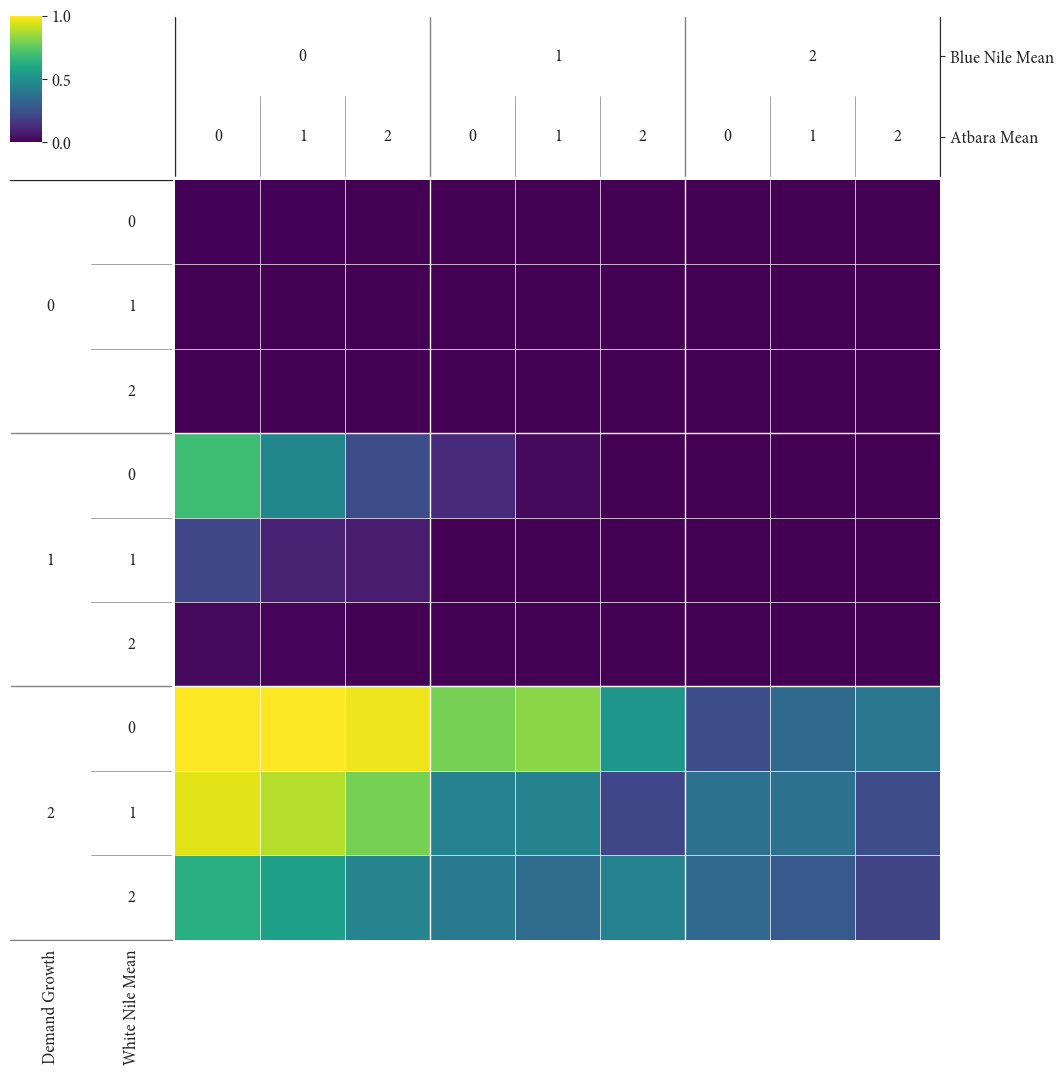

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


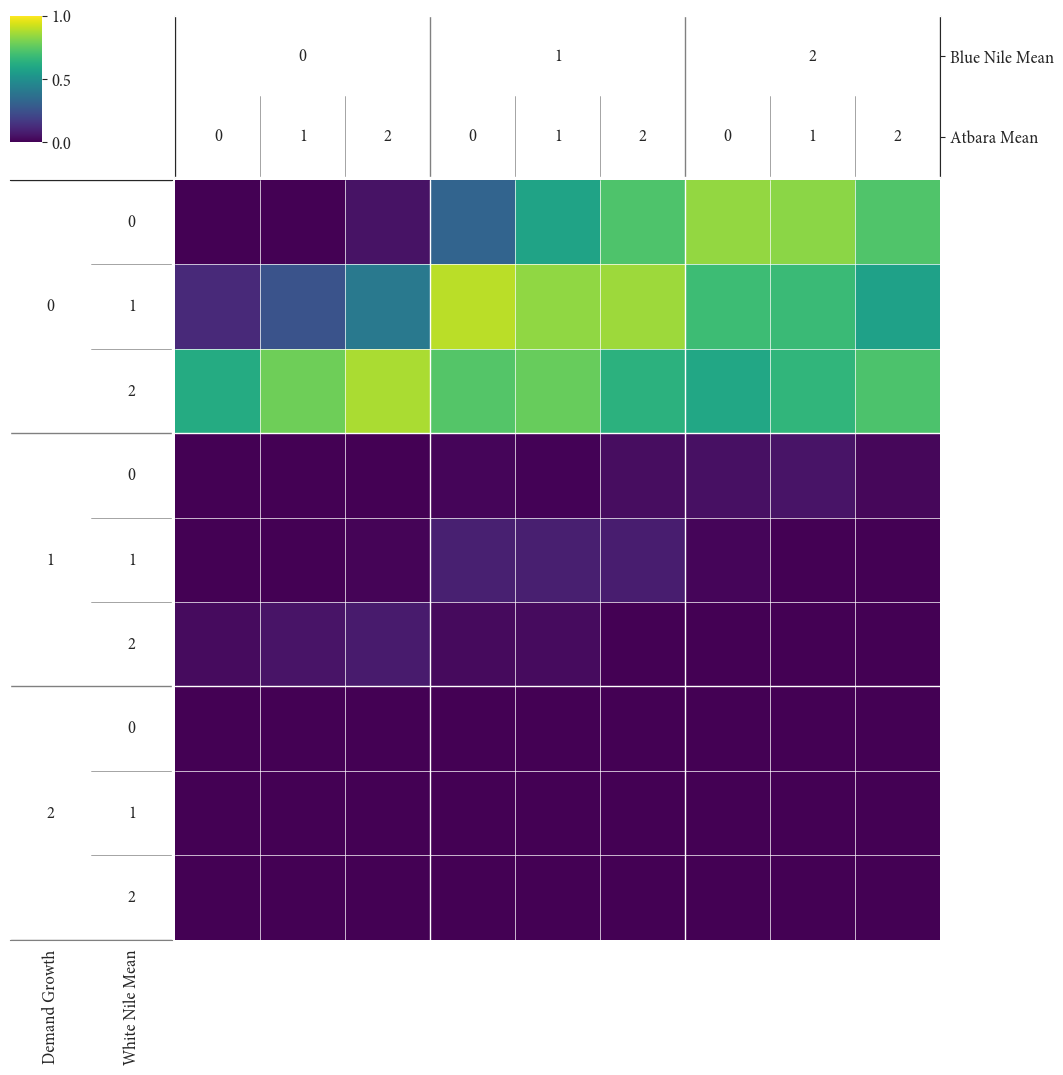

------------
egypt_90
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


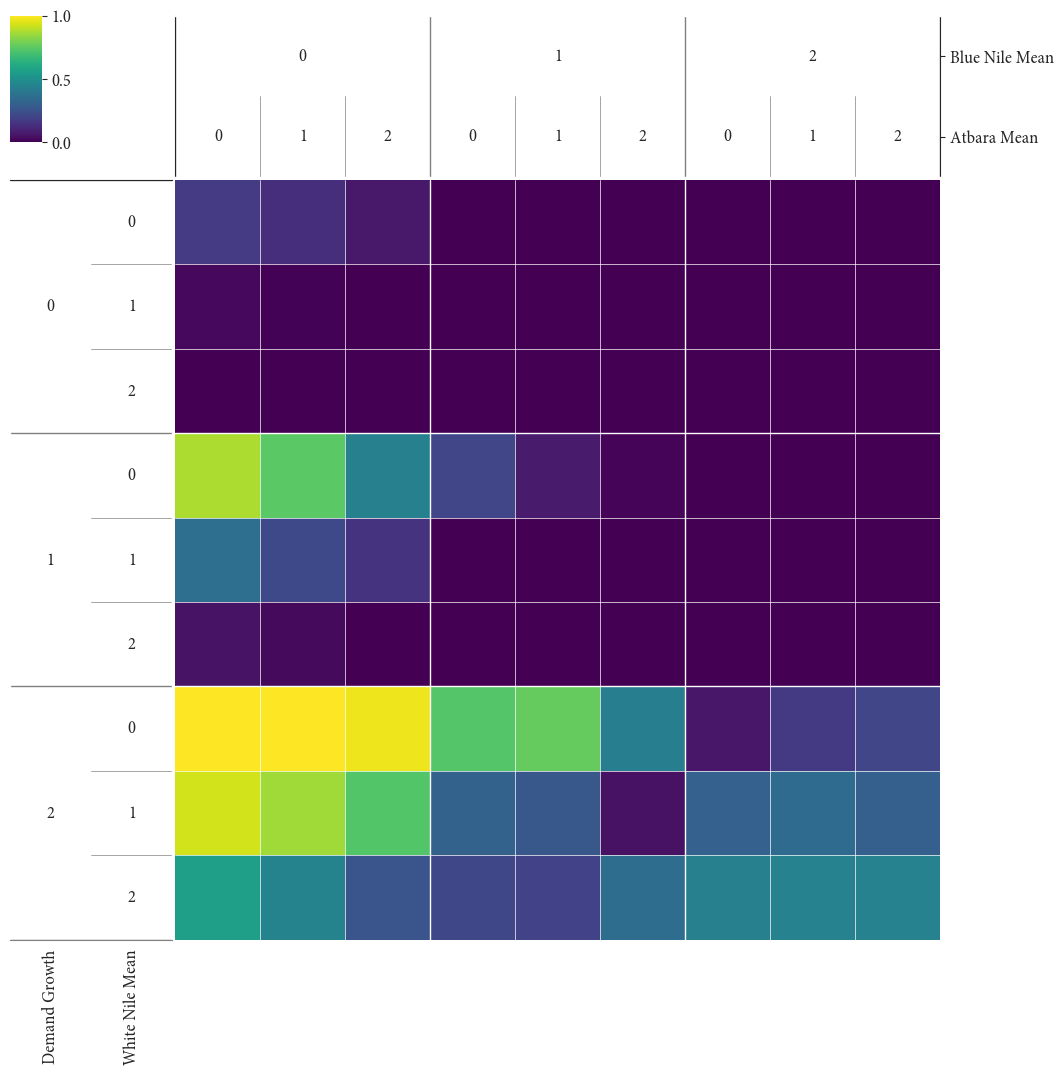

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


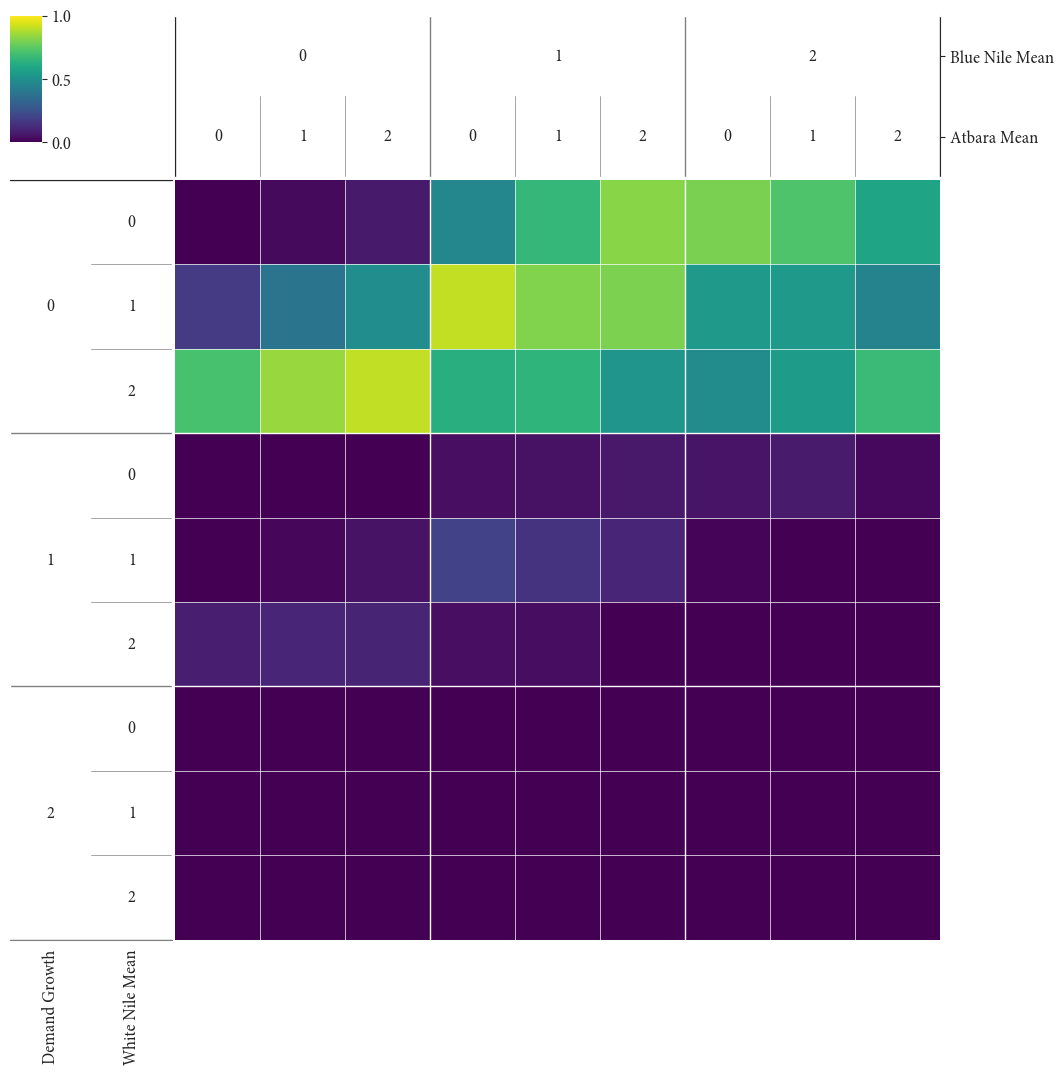

------------
egypt_low_had
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


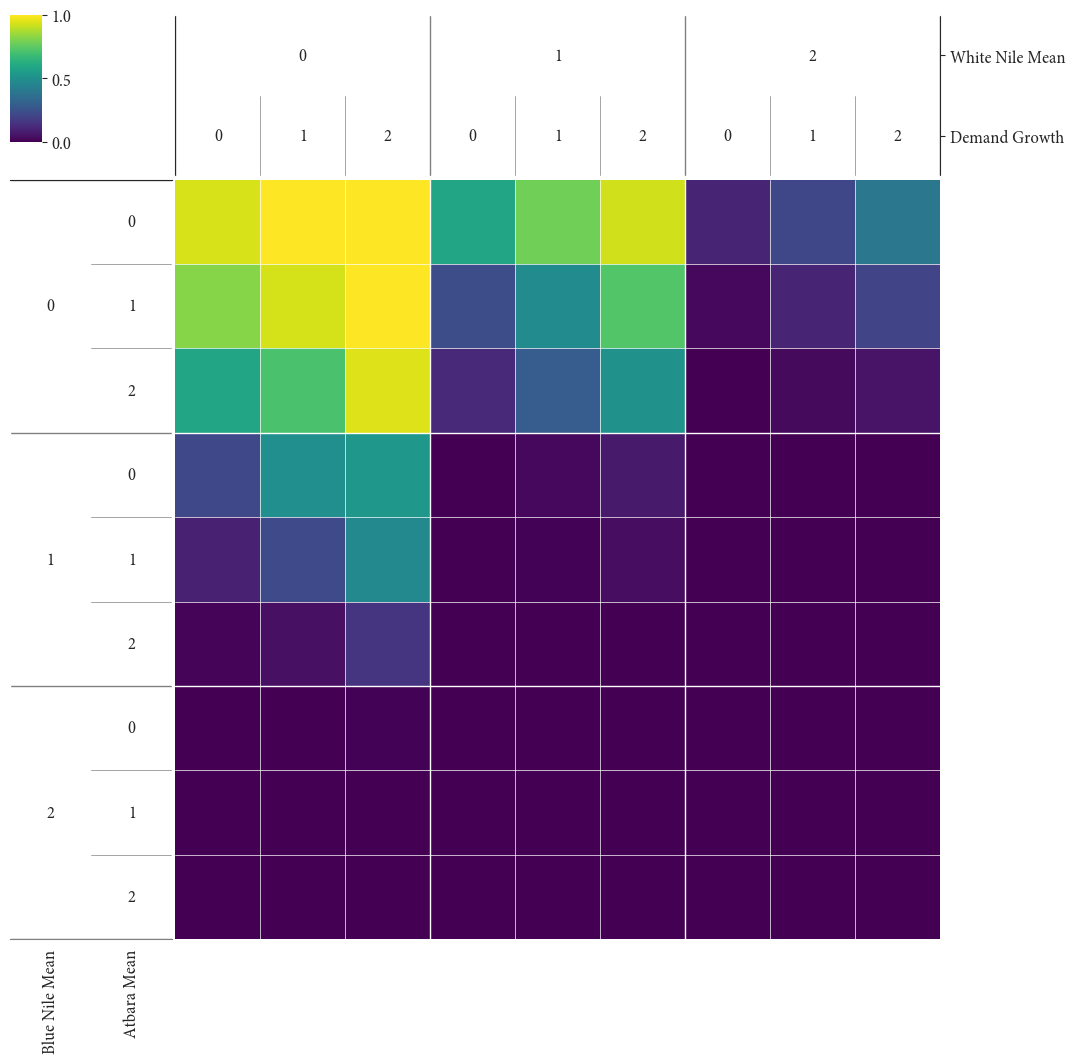

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


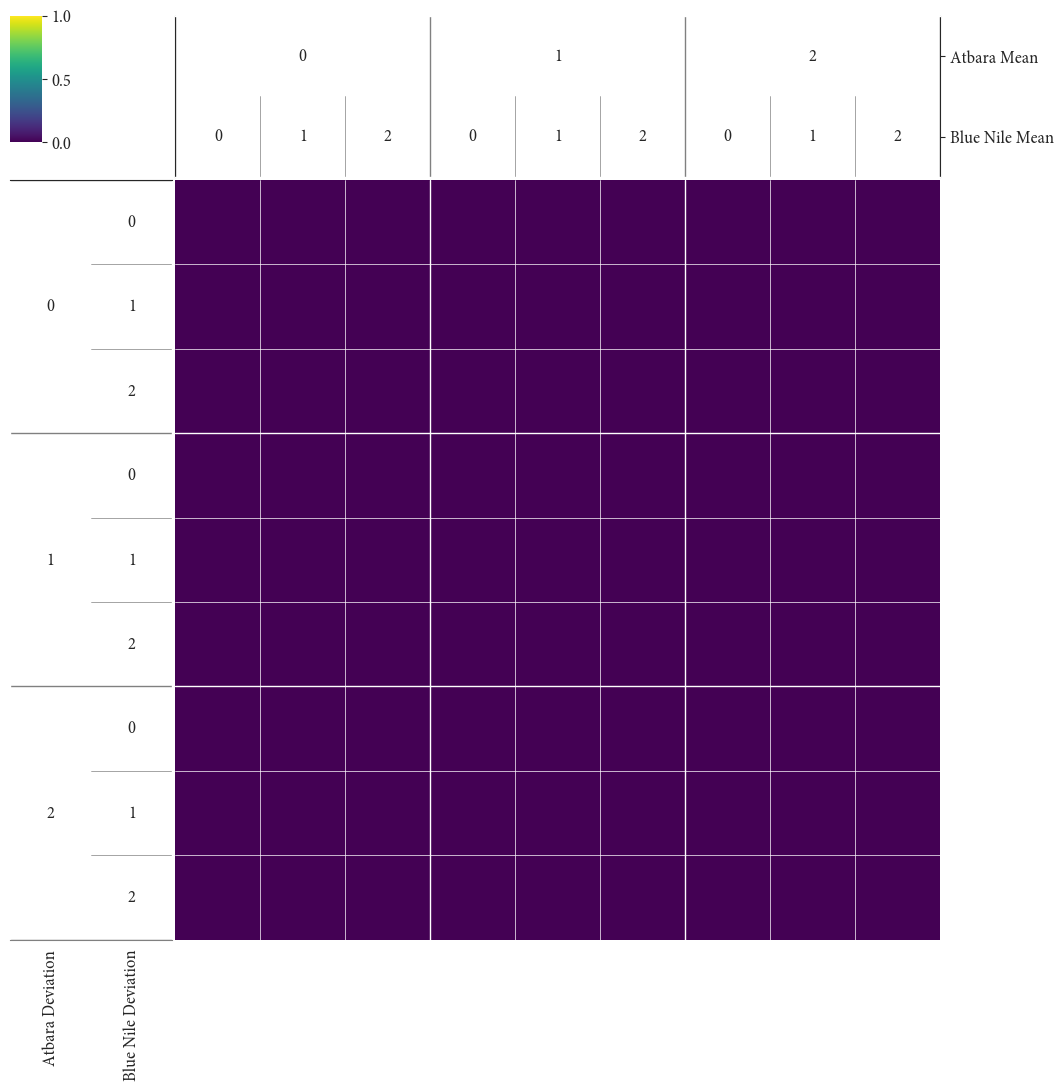

------------
sudan_irr
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


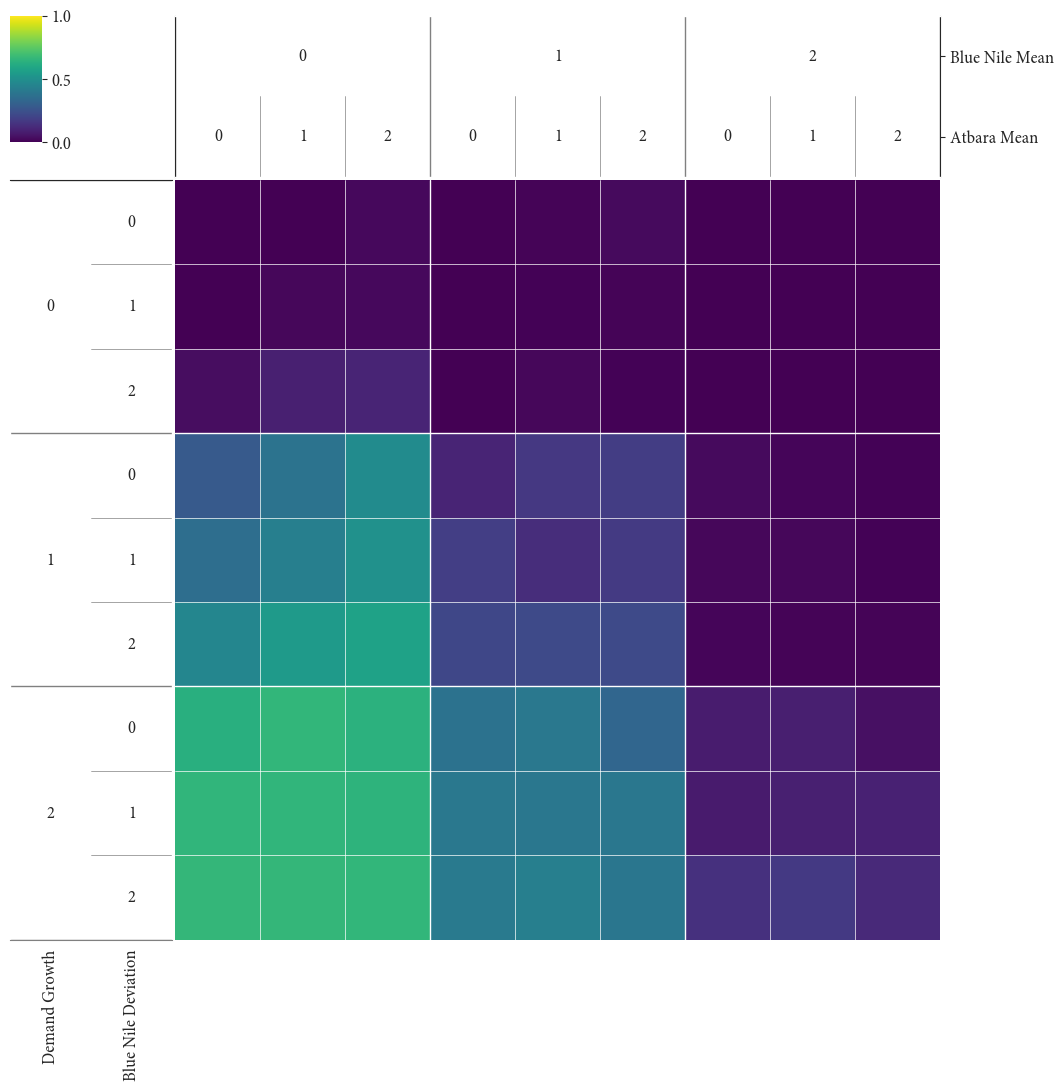

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


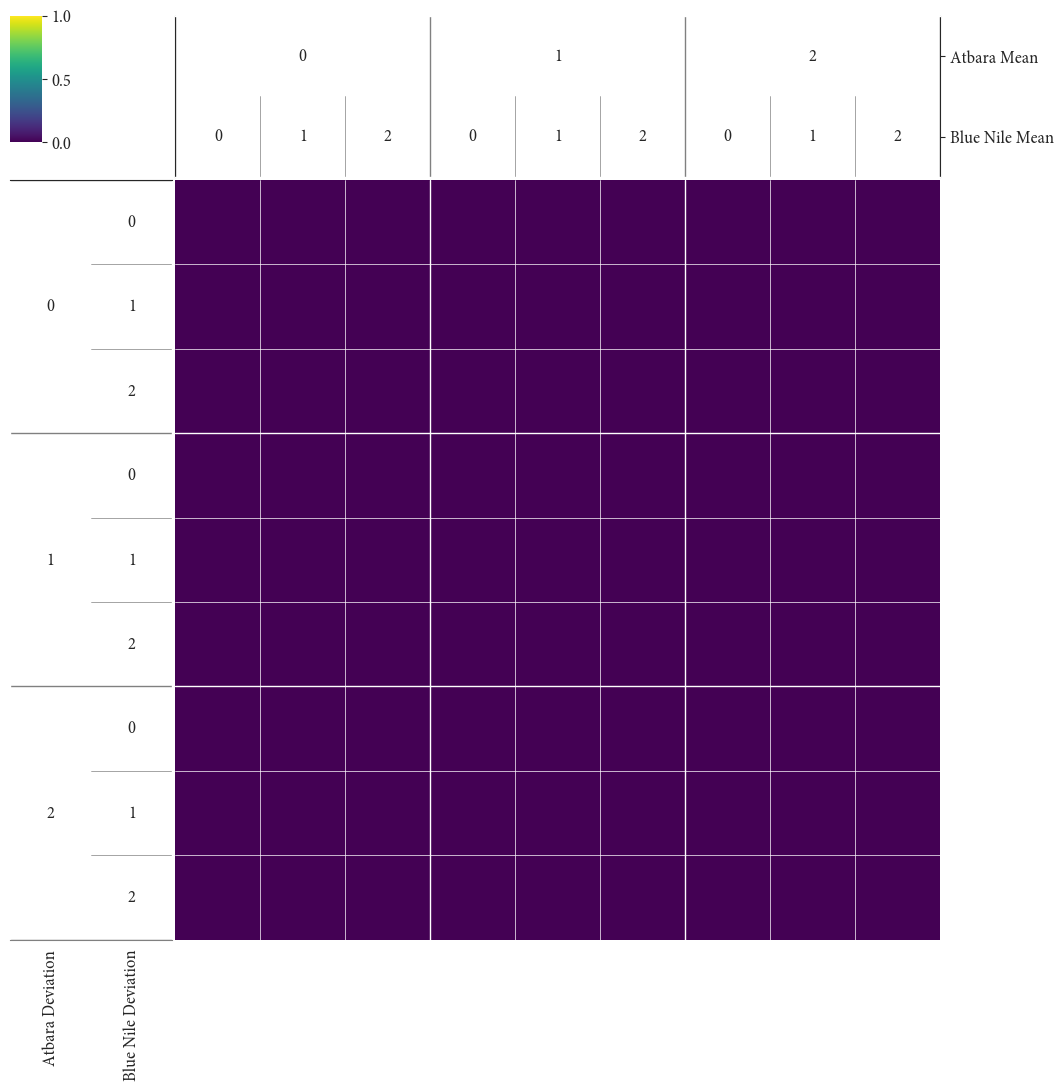

------------
sudan_90
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


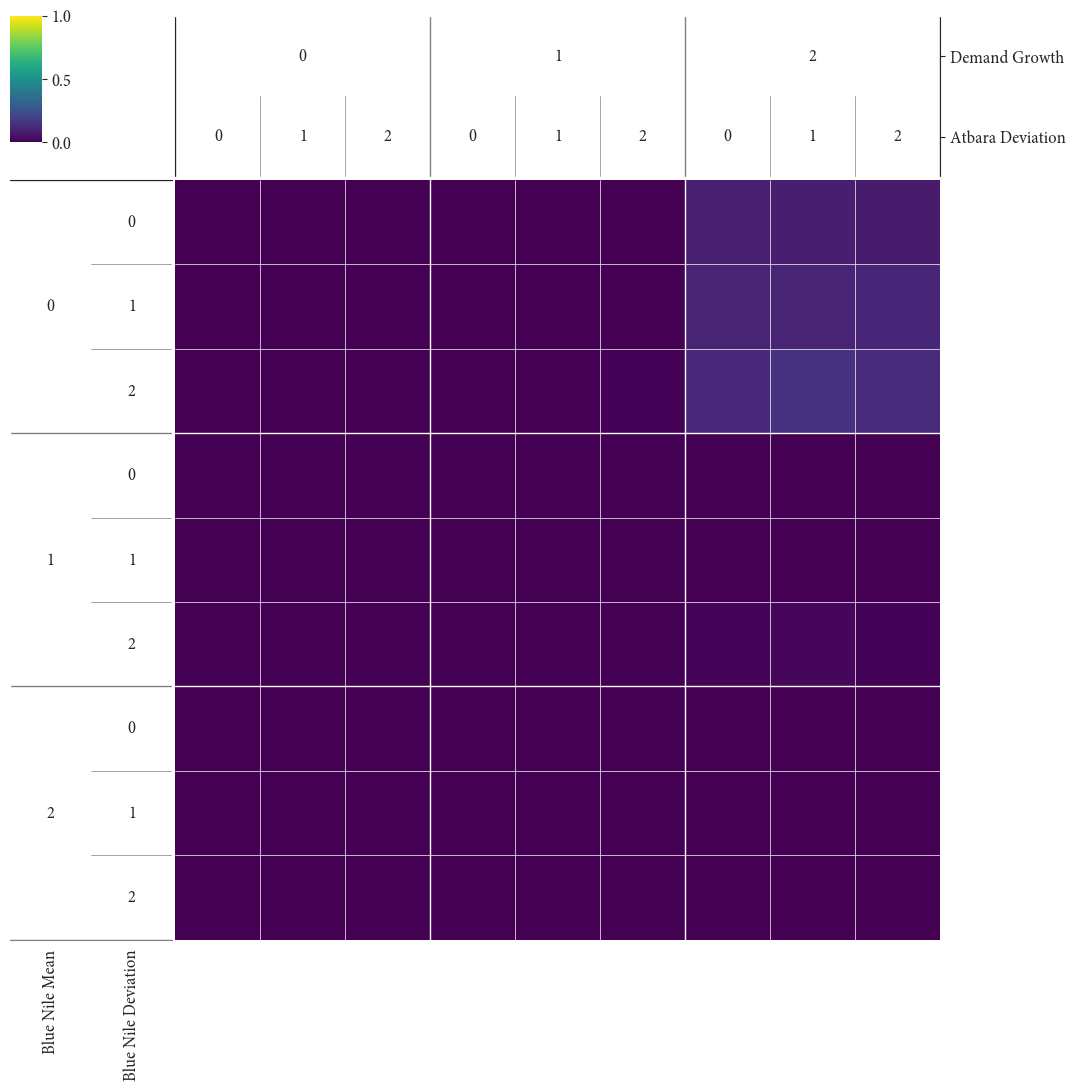

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


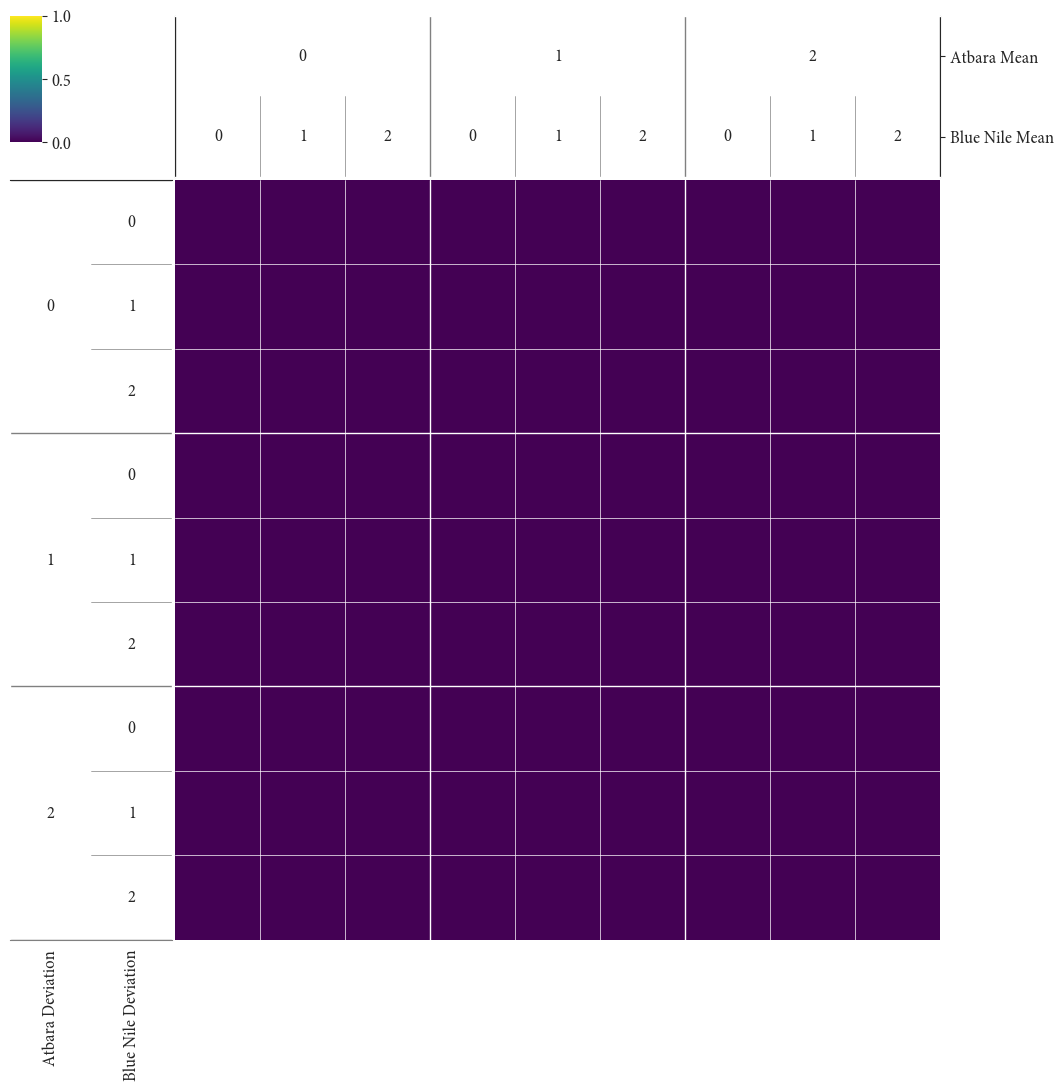

------------
ethiopia_hydro
------------

Bigger than 80th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


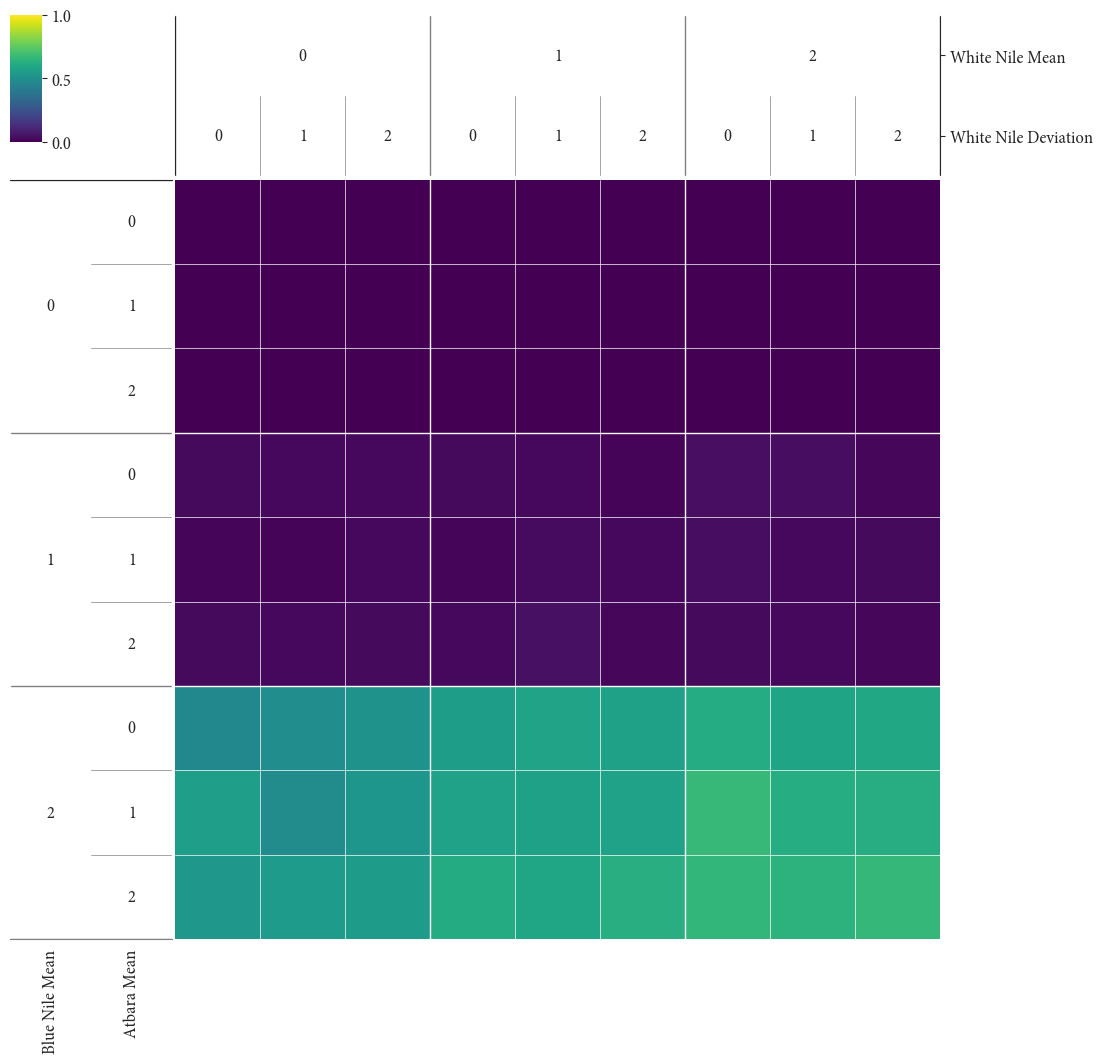

Smaller than 20th


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


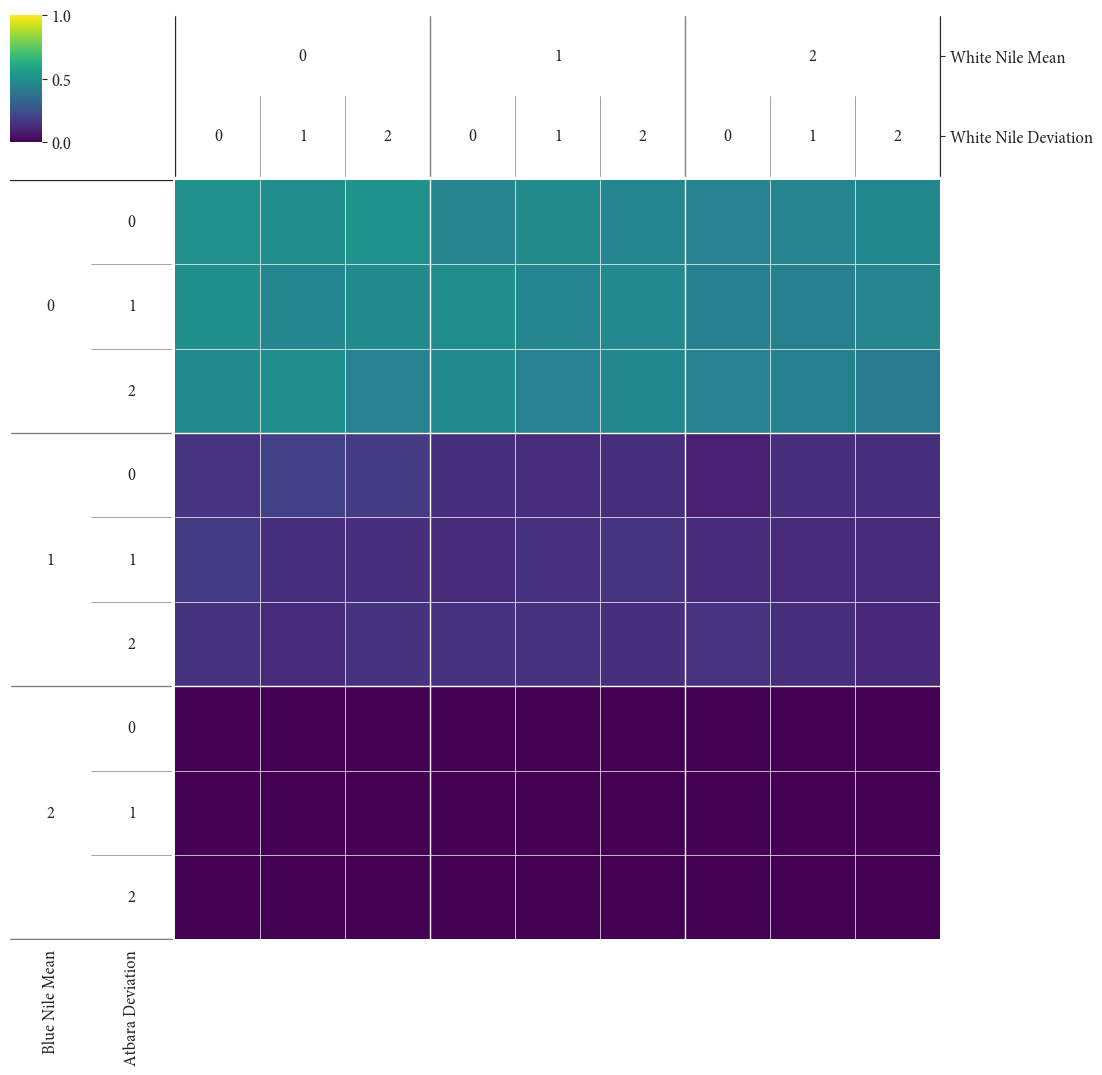

In [12]:
# TODO: 1) Nicely rename axis labels. 2) Set-up .svg image saver code 
# Let's see vulnerable and opportunity scenarios (</> than 20% best/worst for each objective):
x = experiments.iloc[:, :7].copy()
x.columns = ["Atbara Deviation", "Atbara Mean", "Blue Nile Deviation", "Blue Nile Mean", "White Nile Deviation", "White Nile Mean", "Demand Growth"]

for i, obj in enumerate(outcomes.iloc[:, :-2].columns):
    print("------------")
    print(obj)
    print("------------\n")
    print("Bigger than 80th")
    y = outcomes[obj] > np.percentile(outcomes[obj], 80)
    dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
    plt.show()
    print("Smaller than 20th")
    y = outcomes[obj] < np.percentile(outcomes[obj], 20)
    dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12, 12))
    plt.show()

Let's check the robustness of policies by calculating the maximum regret metric across scenarios:
Currently 10% to the best possible minus the absolute worst. **TODO: Consider backing this up (or change) with literature!**

In [13]:
def calculate_max_regret(objective_vector, direction):
    if direction == "min":
        best = np.percentile(objective_vector, 10, interpolation="closest_observation")
        worst = max(objective_vector)
    elif direction == "max":
        best = np.percentile(objective_vector, 90, interpolation="closest_observation")
        worst = min(objective_vector)

    return abs(best - worst)

In [14]:
directions = ["min", "min", "min", "min", "min", "max"]
overall_scores = {}
for policy in np.unique(experiments["policy"]):
    scores = {}

    logical = outcomes["policy"] == policy

    for i, outcome in enumerate(outcomes.columns[:6]):
        value = outcomes[outcome][logical]
        regret = calculate_max_regret(value, directions[i])
        scores[outcome] = regret
    overall_scores[policy] = scores
regret_scores = pd.DataFrame.from_dict(overall_scores).T
regret_scores

<ipython-input-13-81daa5c04f96>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  best = np.percentile(objective_vector, 10, interpolation="closest_observation")


egypt_irr  egypt_90  egypt_low_had  sudan_irr  \
Best Egypt 90$^{th}$          26.52      6.29           0.82       0.46   
Best Egypt HAD                25.92      5.60           0.84       0.65   
Best Egypt Irr.               26.53      6.19           0.82       0.53   
Best Ethiopia Hydropower      27.36      5.52           0.88       0.05   
Compromise: Absolute          25.81      5.40           0.84       0.62   
Compromise: Percentile        27.37      5.40           0.87       0.00   

                          sudan_90  ethiopia_hydro  
Best Egypt 90$^{th}$          0.13            5.38  
Best Egypt HAD                0.13            8.86  
Best Egypt Irr.               0.00            8.35  
Best Ethiopia Hydropower      0.00            7.39  
Compromise: Absolute          0.06            8.80  
Compromise: Percentile        0.00            7.85

**TODO: Color-code (and font type) this pandas dataframe in columns to show robustness!**

In [15]:
ordered_regret = regret_scores.loc[
    [
        "Best Egypt Irr.",
        "Best Egypt 90$^{th}$",
        "Best Egypt HAD",
        "Best Ethiopia Hydropower",
        "Compromise: Percentile",
        "Compromise: Absolute",
    ]
]

Best Egypt Irr.                              Best Egypt Irr.
Best Egypt 90$^{th}$                    Best Egypt 90$^{th}$
Best Egypt HAD                                Best Egypt HAD
Best Ethiopia Hydropower            Best Ethiopia Hydropower
Compromise: Percentile      Compromise: Percentile Threshold
Compromise: Absolute          Compromise: Absolute Threshold
Name: Name, dtype: object


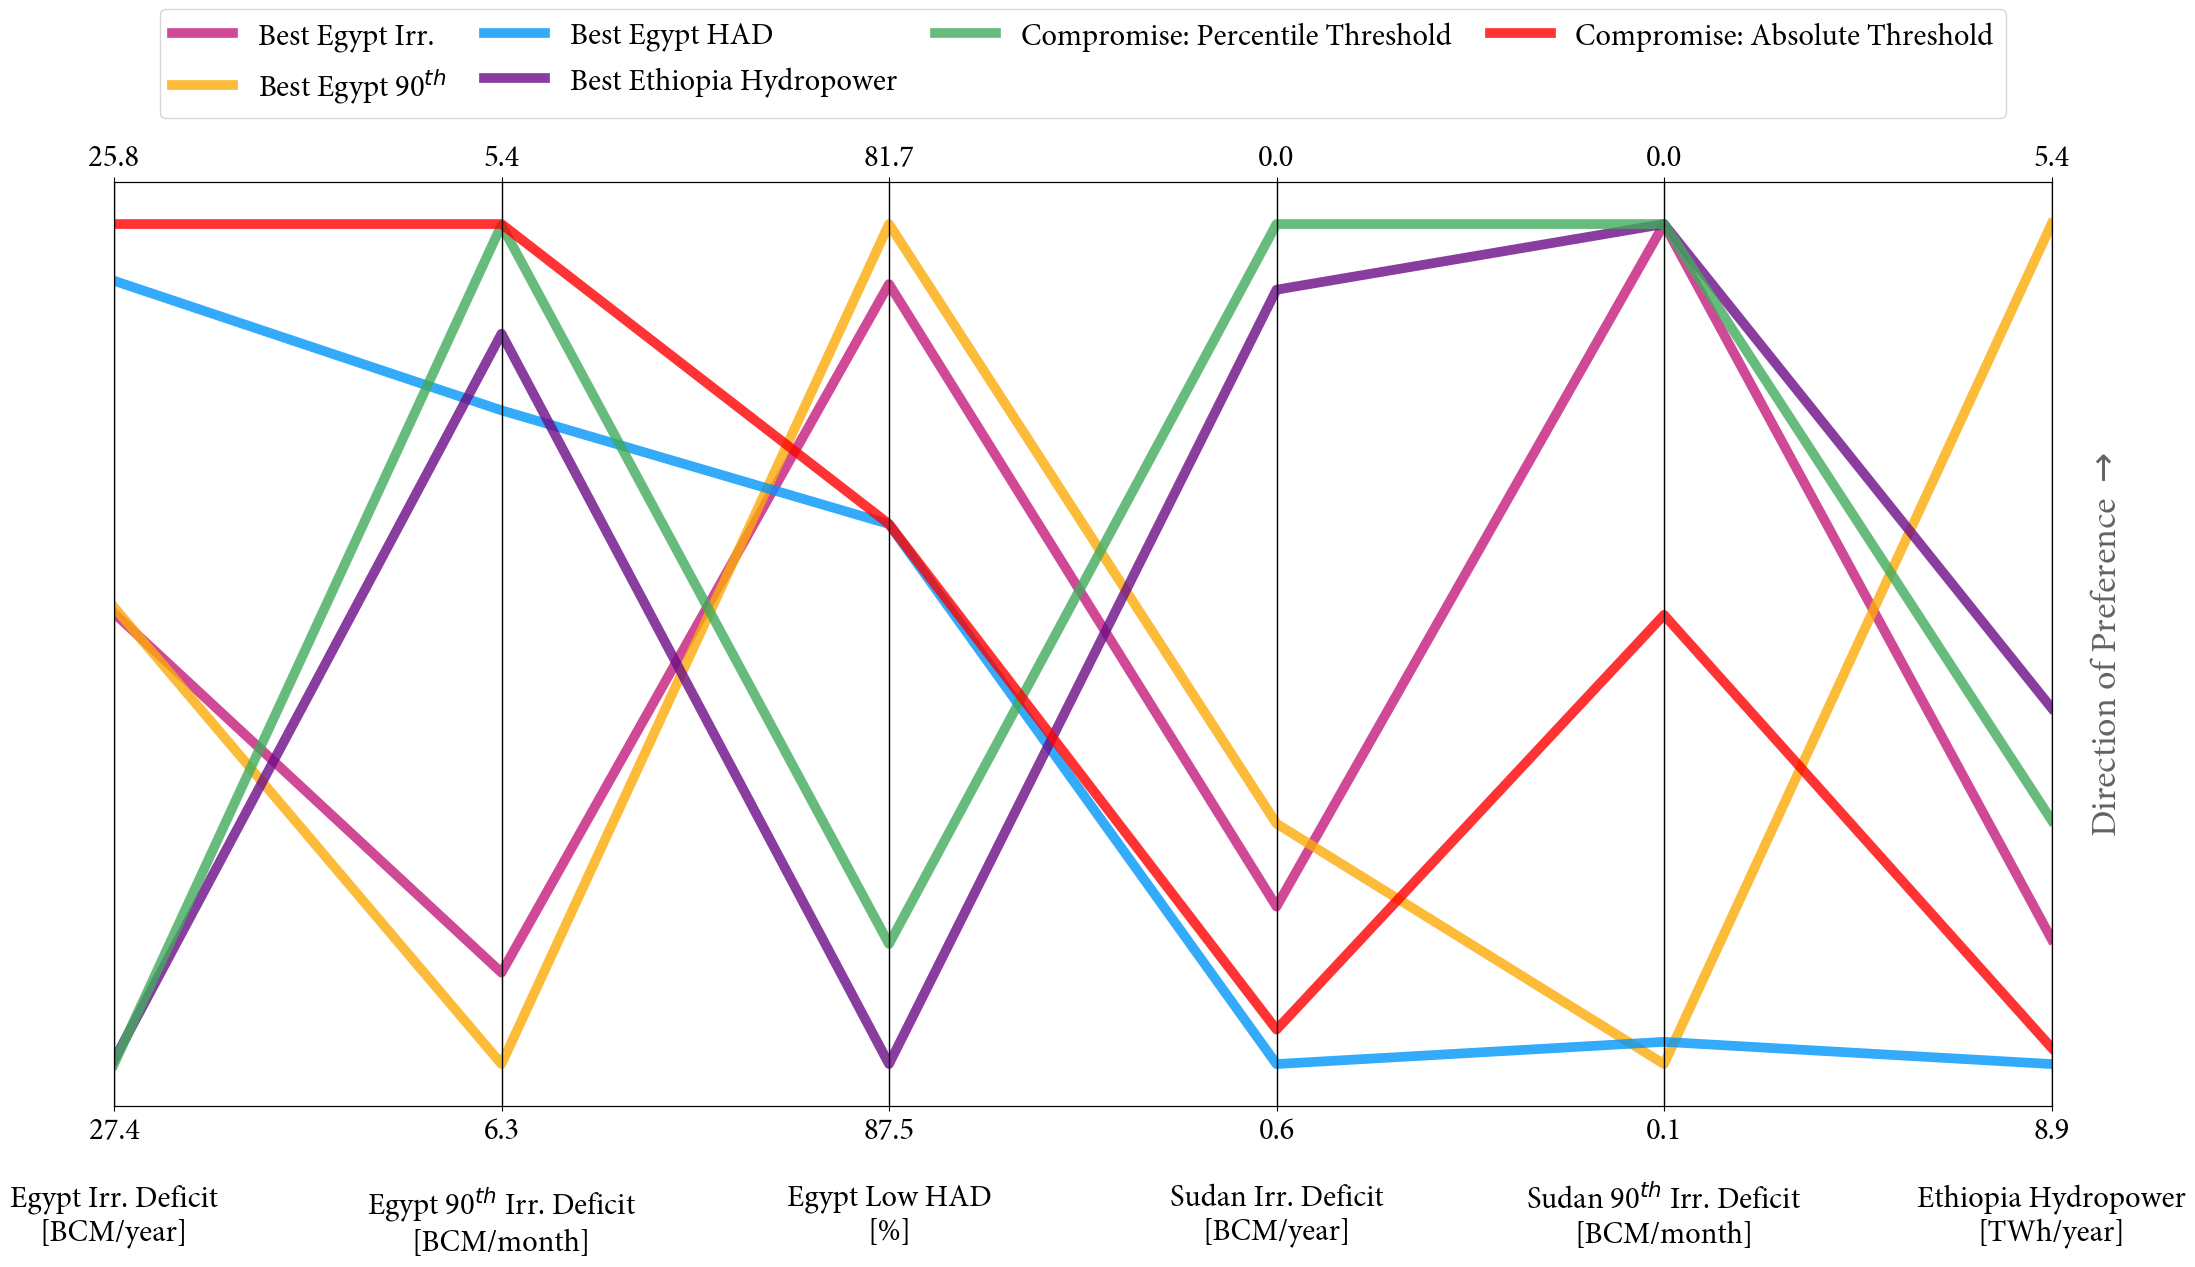

In [16]:
importlib.reload(plotter)
from plotter import parallel_plots_few_policies

solution_names = [
    "Best Egypt Irr.",
    "Best Egypt 90$^{th}$",
    "Best Egypt HAD",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]

parallel_plots_few_policies(ordered_regret, solution_names=solution_names)

Now, my ambition is to identify at which regions of the uncertainty space, which policies perform superior and how much for each objective! For the "how much" part of this task, I will simply calculate the absolute improvement that the best policy in that particular scenario makes compared to the second best policy.

In [17]:
directions = ["min", "min", "min", "min", "min", "max"]
best_performer_df = pd.DataFrame(range(5000),columns=['Scenario'])
best_performer_df["Blue Nile Mean"] = experiments["blue_nile_mean_coef"][:5000]
best_performer_df["White Nile Mean"] = experiments["white_nile_mean_coef"][:5000]
best_performer_df["Demand Growth"] = experiments["yearly_demand_growth_rate"][:5000]
best_performer_df["Atbara Mean"] = experiments["atbara_mean_coef"][:5000]

performers = defaultdict(list)
improvements = defaultdict(list)
for scen in tqdm(range(5000)):
    scen_df = outcomes.loc[outcomes.scenario == scen].copy()
    for i, obj in enumerate(outcomes.iloc[:, :-2].columns):
        best, second_best = (scen_df.sort_values(by=[obj], ascending=(directions[i]=="min")).iloc[0:2][obj])
        policy = list(scen_df.loc[scen_df[obj] == best, "policy"])[0]
        improvement = abs(best - second_best)
        performers[obj].append(policy)
        improvements[obj].append(improvement)
        
for obj in outcomes.iloc[:, :-2].columns:     
    best_performer_df[obj] = performers[obj]
    best_performer_df[f"{obj}_improvement"] = improvements[obj]

100%|██████████| 5000/5000 [00:10<00:00, 469.67it/s]


In [18]:
best_performer_df

Scenario  Blue Nile Mean  White Nile Mean  Demand Growth  Atbara Mean  \
0            0            1.11             0.98           0.02         0.80   
1            1            0.94             0.87           0.02         1.03   
2            2            1.24             1.22           0.02         0.79   
3            3            1.17             1.20           0.01         0.98   
4            4            0.96             1.05           0.02         1.21   
...        ...             ...              ...            ...          ...   
4995      4995            0.96             1.04           0.02         0.93   
4996      4996            1.08             1.08           0.02         1.05   
4997      4997            0.97             0.76           0.02         1.12   
4998      4998            0.97             1.08           0.02         1.15   
4999      4999            0.79             0.90           0.02         1.07   

                 egypt_irr  egypt_irr_improvement              egypt_90  \
0     Best Egypt 90$^{th}$                   0.45  Best Egypt 90$^{th}$   
1          Best Egypt Irr.                   0.25       Best Egypt Irr.   
2          Best Egypt Irr.                   0.37  Compromise: Absolute   
3          Best Egypt Irr.                   0.21       Best Egypt Irr.   
4     Best Egypt 90$^{th}$                   0.55  Best Egypt 90$^{th}$   
...                    ...                    ...                   ...   
4995       Best Egypt Irr.                   0.13  Best Egypt 90$^{th}$   
4996       Best Egypt Irr.                   0.50       Best Egypt Irr.   
4997       Best Egypt Irr.                   0.35       Best Egypt Irr.   
4998       Best Egypt Irr.                   0.03       Best Egypt Irr.   
4999        Best Egypt HAD                   0.16        Best Egypt HAD   

      egypt_90_improvement         egypt_low_had  egypt_low_had_improvement  \
0                     0.12       Best Egypt Irr.                       0.00   
1                     0.06        Best Egypt HAD                       0.02   
2                     0.03       Best Egypt Irr.                       0.00   
3                     0.02       Best Egypt Irr.                       0.00   
4                     0.22       Best Egypt Irr.                       0.00   
...                    ...                   ...                        ...   
4995                  0.05        Best Egypt HAD                       0.01   
4996                  0.31       Best Egypt Irr.                       0.00   
4997                  0.16        Best Egypt HAD                       0.01   
4998                  0.04       Best Egypt Irr.                       0.00   
4999                  0.07  Best Egypt 90$^{th}$                       0.04   

                     sudan_irr  sudan_irr_improvement         sudan_90  \
0               Best Egypt HAD                   0.00  Best Egypt Irr.   
1       Compromise: Percentile                   0.00  Best Egypt Irr.   
2              Best Egypt Irr.                   0.00  Best Egypt Irr.   
3              Best Egypt Irr.                   0.00  Best Egypt Irr.   
4               Best Egypt HAD                   0.00  Best Egypt Irr.   
...                        ...                    ...              ...   
4995  Best Ethiopia Hydropower                   0.00  Best Egypt Irr.   
4996            Best Egypt HAD                   0.00  Best Egypt Irr.   
4997    Compromise: Percentile                   0.00  Best Egypt Irr.   
4998            Best Egypt HAD                   0.00  Best Egypt Irr.   
4999    Compromise: Percentile                   0.00  Best Egypt Irr.   

      sudan_90_improvement            ethiopia_hydro  \
0                     0.00  Best Ethiopia Hydropower   
1                     0.00  Best Ethiopia Hydropower   
2                     0.00  Best Ethiopia Hydropower   
3                     0.00  Best Ethiopia Hydropower   
4                     0.00  Best Ethio

In [19]:
from ema_workbench.analysis.dimensional_stacking import _prepare_experiments, discretize, plot_pivot_table, dim_ratios, plot_index, plot_line, plot_category

# Use the discretize function from dimensional stacking code: Basically dividing the critical uncertainties into the specified number of bins:
best_performer_df.iloc[:,1:5] = discretize(best_performer_df.iloc[:,1:5], nbins=3,with_labels=False)
best_performer_df

Scenario  Blue Nile Mean  White Nile Mean  Demand Growth  Atbara Mean  \
0            0               2                1              2            0   
1            1               1                0              1            1   
2            2               2                2              1            0   
3            3               2                2              0            1   
4            4               1                1              1            2   
...        ...             ...              ...            ...          ...   
4995      4995               1                1              1            1   
4996      4996               1                1              1            1   
4997      4997               1                0              1            2   
4998      4998               1                1              0            2   
4999      4999               0                0              1            1   

                 egypt_irr  egypt_irr_improvement              egypt_90  \
0     Best Egypt 90$^{th}$                   0.45  Best Egypt 90$^{th}$   
1          Best Egypt Irr.                   0.25       Best Egypt Irr.   
2          Best Egypt Irr.                   0.37  Compromise: Absolute   
3          Best Egypt Irr.                   0.21       Best Egypt Irr.   
4     Best Egypt 90$^{th}$                   0.55  Best Egypt 90$^{th}$   
...                    ...                    ...                   ...   
4995       Best Egypt Irr.                   0.13  Best Egypt 90$^{th}$   
4996       Best Egypt Irr.                   0.50       Best Egypt Irr.   
4997       Best Egypt Irr.                   0.35       Best Egypt Irr.   
4998       Best Egypt Irr.                   0.03       Best Egypt Irr.   
4999        Best Egypt HAD                   0.16        Best Egypt HAD   

      egypt_90_improvement         egypt_low_had  egypt_low_had_improvement  \
0                     0.12       Best Egypt Irr.                       0.00   
1                     0.06        Best Egypt HAD                       0.02   
2                     0.03       Best Egypt Irr.                       0.00   
3                     0.02       Best Egypt Irr.                       0.00   
4                     0.22       Best Egypt Irr.                       0.00   
...                    ...                   ...                        ...   
4995                  0.05        Best Egypt HAD                       0.01   
4996                  0.31       Best Egypt Irr.                       0.00   
4997                  0.16        Best Egypt HAD                       0.01   
4998                  0.04       Best Egypt Irr.                       0.00   
4999                  0.07  Best Egypt 90$^{th}$                       0.04   

                     sudan_irr  sudan_irr_improvement         sudan_90  \
0               Best Egypt HAD                   0.00  Best Egypt Irr.   
1       Compromise: Percentile                   0.00  Best Egypt Irr.   
2              Best Egypt Irr.                   0.00  Best Egypt Irr.   
3              Best Egypt Irr.                   0.00  Best Egypt Irr.   
4               Best Egypt HAD                   0.00  Best Egypt Irr.   
...                        ...                    ...              ...   
4995  Best Ethiopia Hydropower                   0.00  Best Egypt Irr.   
4996            Best Egypt HAD                   0.00  Best Egypt Irr.   
4997    Compromise: Percentile                   0.00  Best Egypt Irr.   
4998            Best Egypt HAD                   0.00  Best Egypt Irr.   
4999    Compromise: Percentile                   0.00  Best Egypt Irr.   

      sudan_90_improvement            ethiopia_hydro  \
0                     0.00  Best Ethiopia Hydropower   
1                     0.00  Best Ethiopia Hydropower   
2                     0.00  Best Ethiopia Hydropower   
3                     0.00  Best Ethiopia Hydropower   
4                     0.00  Best Ethio

Below are the definitions of two functions used for plotting the policy/improvement visual:

In [94]:
def my_scatter_plotter(policy_pvt, improvement_pvt, ax_plot):
    maximum_imp = improvement_pvt.max().max()
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    ax_plot.scatter(
                        (3*k+l+0.5), (3*i+j+0.5), s=(500/maximum_imp)*improvement_pvt.loc[(i,j),(k,l)],
                        c=policy_colors[policy_pvt.loc[(i,j),(k,l)]],
                    )
    #ax_plot.axis("off")

    # set the tick labels
    ax_plot.set_xticks([])
    ax_plot.set_yticks([])
    ax_plot.invert_yaxis()
    ax_plot.hlines([0,1,2,4,5,7,8,9], 0, 9, colors="grey")
    ax_plot.hlines([3,6], 0, 9, linewidths=3, colors="grey")
    ax_plot.vlines([0,1,2,4,5,7,8,9], 0, 9, colors="grey")
    ax_plot.vlines([3,6], 0, 9, linewidths=3, colors="grey")
    
    return ax_plot
    

def plot_policy_shift_scenarios(
    policy_pvt, improvement_pvt, unit_imp, plot_labels=True, plot_cats=True, figsize=(10, 10), cmap="viridis", **kwargs
):
    """visualize a pivot table using colors
    Parameters
    ----------
    table : Pandas DataFrame
    plot_labels : bool, optional
                 if true, display uncertain factor names
    plot_cats : bool, optional
                 if true, display category labels for each uncertain factor
    fig_size : tuple of 2 ints, optional
               size of the figure to create
    cmap : matplotlib colormap name or object, optional
           default is viridis (requires matplotlib 1.5 or higher)
    kwargs : other keyword arguments
             All other keyword arguments are passed to ax.pcolormesh.
    Returns
    -------
    Figure
    """

#with sns.axes_style("white"):
    fig = plt.figure(figsize=figsize)

    width_ratios = dim_ratios(figsize=figsize, axis=1)
    height_ratios = dim_ratios(figsize=figsize, axis=0)

    gs = mpl.gridspec.GridSpec(
        3,
        3,
        wspace=0.01,
        hspace=0.01,
        width_ratios=width_ratios,
        height_ratios=height_ratios,
    )

    ax_plot = fig.add_subplot(gs[2, 2])
    ax_rows = fig.add_subplot(gs[2, 0:2], facecolor="white")
    ax_cols = fig.add_subplot(gs[0:2, 2], facecolor="white")
    cax = fig.add_subplot(gs[0, 0])

    ax_plot = my_scatter_plotter(policy_pvt, improvement_pvt, ax_plot)
    
   # plot row labeling
    ax_rows.set_ylim(ax_plot.get_ylim())
    ax_rows.set_xlim(0, 1)
    plot_index(
        ax_rows,
        ax_plot,
        axis=1,
        index=improvement_pvt.index,
        plot_labels=plot_labels,
        plot_cats=plot_cats,
    )

    # plot column labeling
    ax_cols.set_xlim(ax_plot.get_xlim())
    ax_cols.set_ylim(0, 1)
    plot_index(
        ax_cols,
        ax_plot,
        axis=0,
        index=improvement_pvt.columns,
        plot_labels=plot_labels,
        plot_cats=plot_cats,
    )
    
    unique_policies = []
    for i in policy_pvt.values:
        unique_policies += list(i)

    unique_policies = list(set(unique_policies))
    
    legend_policies = [Line2D([0], [0], marker='o', color="w", label=pol,
                          markerfacecolor=policy_colors[pol], markersize=10) for pol in unique_policies]
    maximum_imp = pvt_improvement.max().max()
    median_imp = pvt_improvement.median().median()
    
    legend_size = [
        Line2D([0], [0], marker='o', color="w", label=f"{round(maximum_imp,2)} {unit_imp}", markerfacecolor="k", markersize=math.sqrt(500)),
        Line2D([0], [0], marker='o', color="w", label=f"{round(median_imp,2)} {unit_imp}", markerfacecolor="k", markersize=math.sqrt(500*median_imp/maximum_imp))
        
    ]
    cax.axis("off")
    label_count = len(legend_policies+legend_size)
    lgnd = cax.legend(handles=legend_policies+legend_size, loc='upper center', bbox_to_anchor=(1.7,0.1+label_count*0.2), frameon=False, fontsize="small", labelspacing=1.2)
    lgnd.legendHandles[-2]._legmarker.set_markersize(math.sqrt(500))
    lgnd.legendHandles[-1]._legmarker.set_markersize(math.sqrt(500*median_imp/maximum_imp))

    return fig

0it [00:00, ?it/s]

------------
egypt_irr
------------



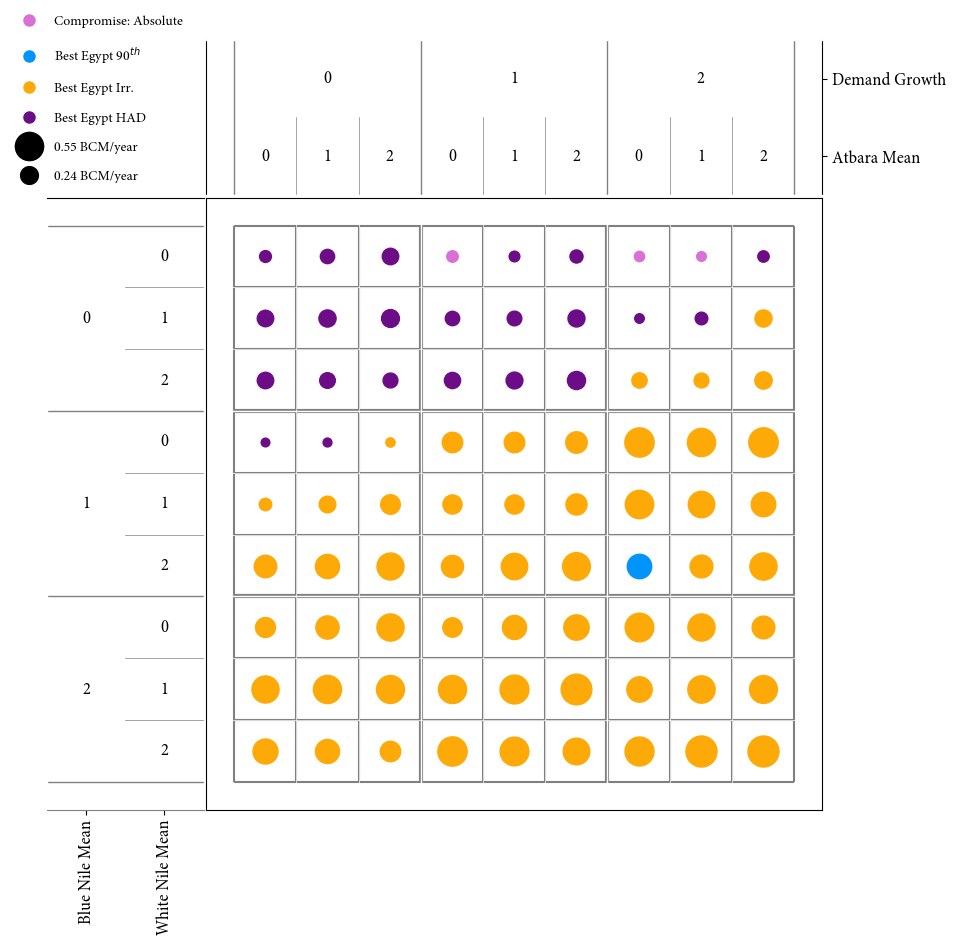

1it [00:02,  2.67s/it]

------------
egypt_90
------------



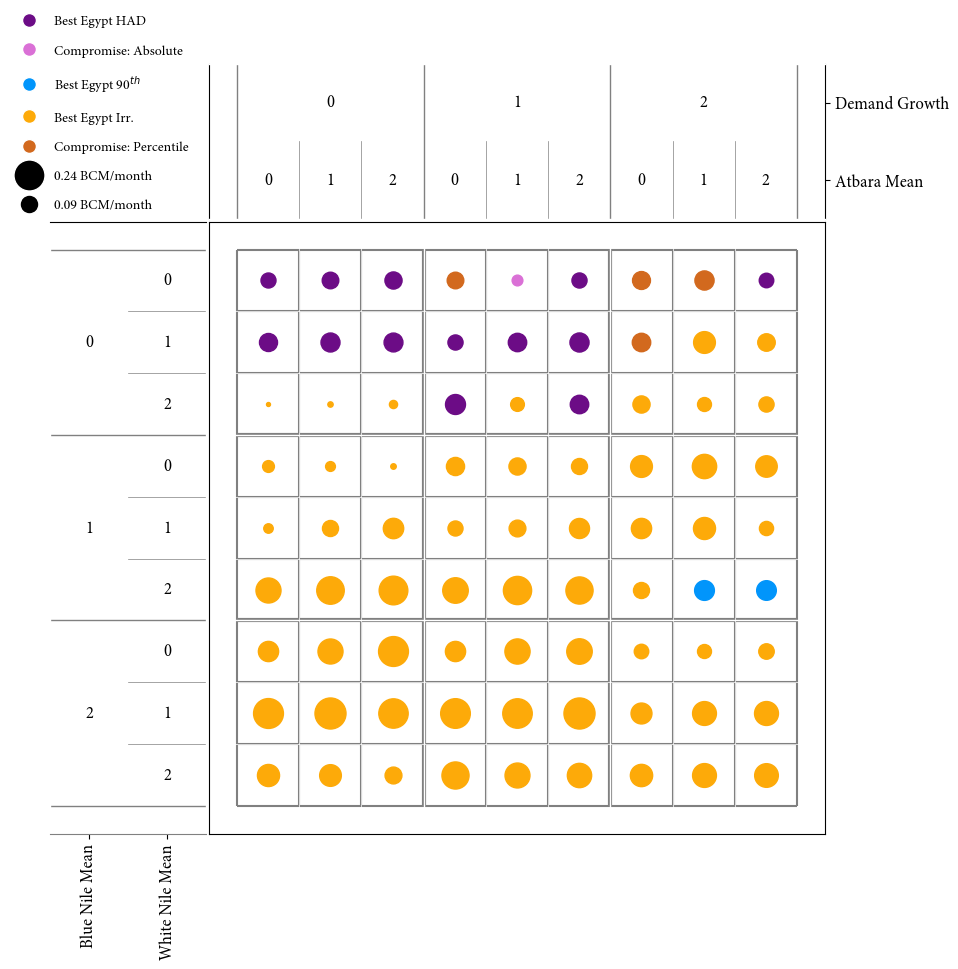

2it [00:05,  2.69s/it]

------------
egypt_low_had
------------



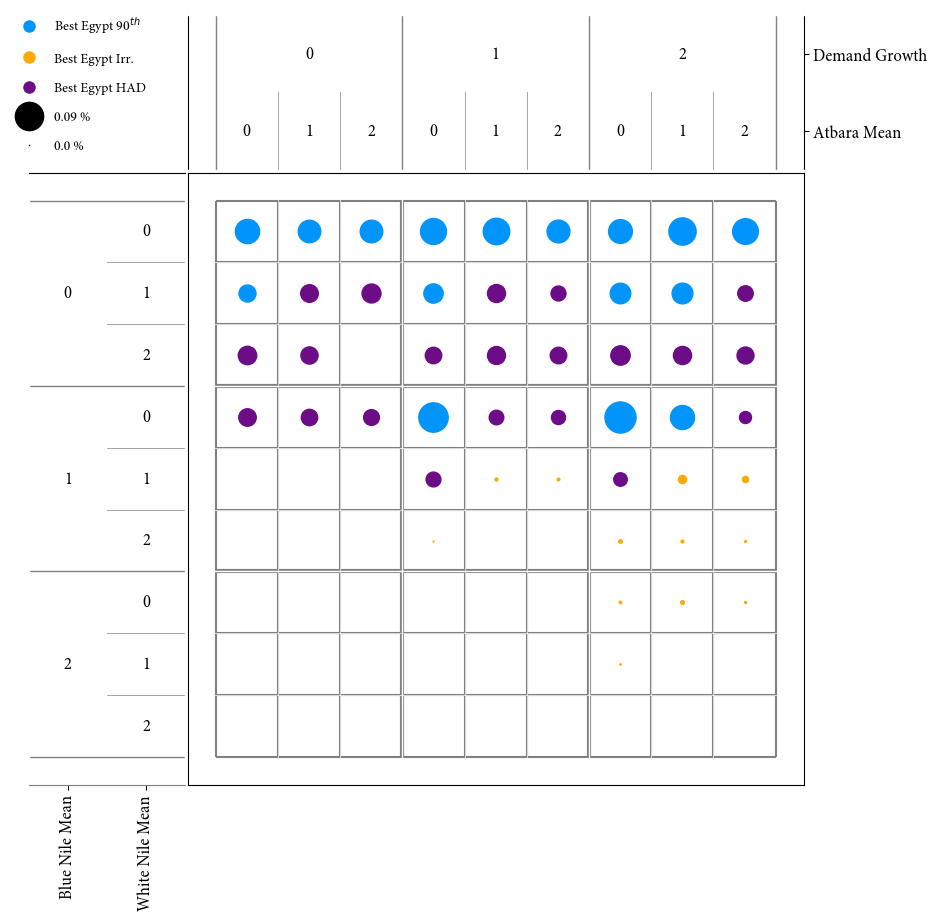

3it [00:08,  2.72s/it]

------------
sudan_irr
------------



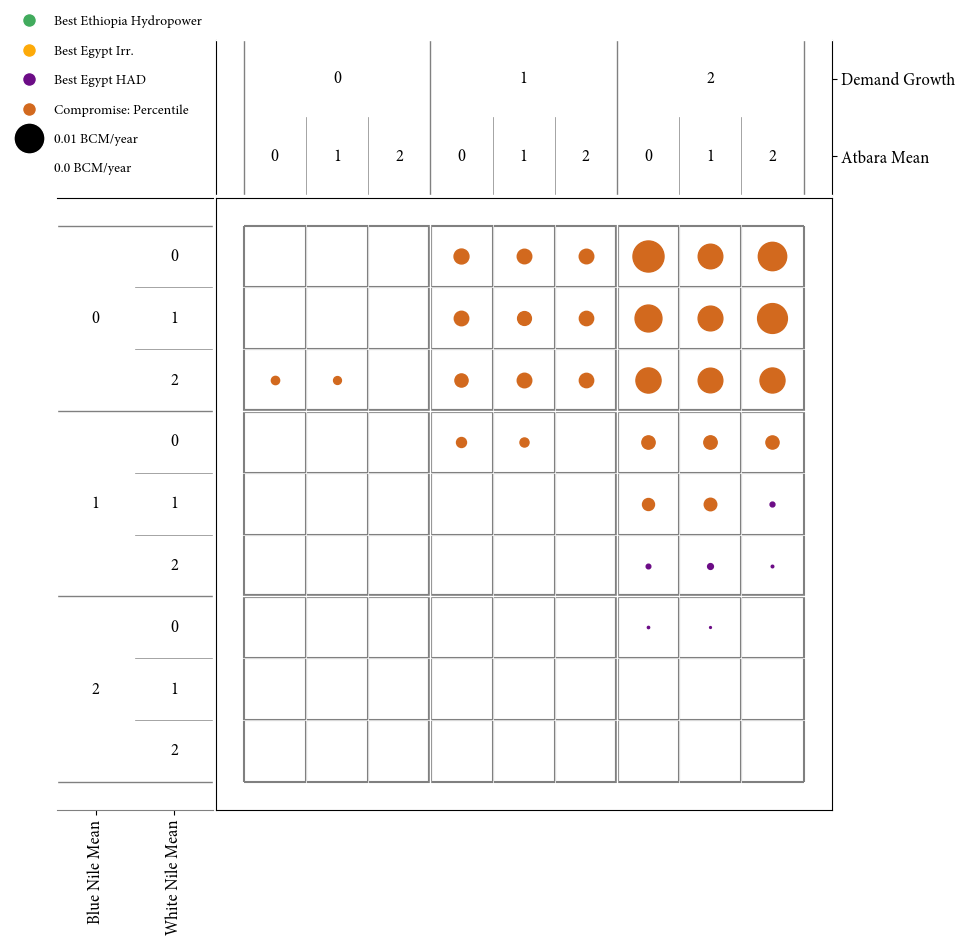

4it [00:10,  2.64s/it]

------------
sudan_90
------------



<ipython-input-94-2a1fdd1c4bbe>:8: RuntimeWarning: divide by zero encountered in double_scalars
  (3*k+l+0.5), (3*i+j+0.5), s=(500/maximum_imp)*improvement_pvt.loc[(i,j),(k,l)],
<ipython-input-94-2a1fdd1c4bbe>:8: RuntimeWarning: invalid value encountered in double_scalars
  (3*k+l+0.5), (3*i+j+0.5), s=(500/maximum_imp)*improvement_pvt.loc[(i,j),(k,l)],
<ipython-input-94-2a1fdd1c4bbe>:106: RuntimeWarning: invalid value encountered in double_scalars
  Line2D([0], [0], marker='o', color="w", label=f"{round(median_imp,2)} {unit_imp}", markerfacecolor="k", markersize=math.sqrt(500*median_imp/maximum_imp))


ValueError: need at least one array to concatenate

<Figure size 1000x1000 with 4 Axes>

5it [00:12,  2.44s/it]

------------
ethiopia_hydro
------------



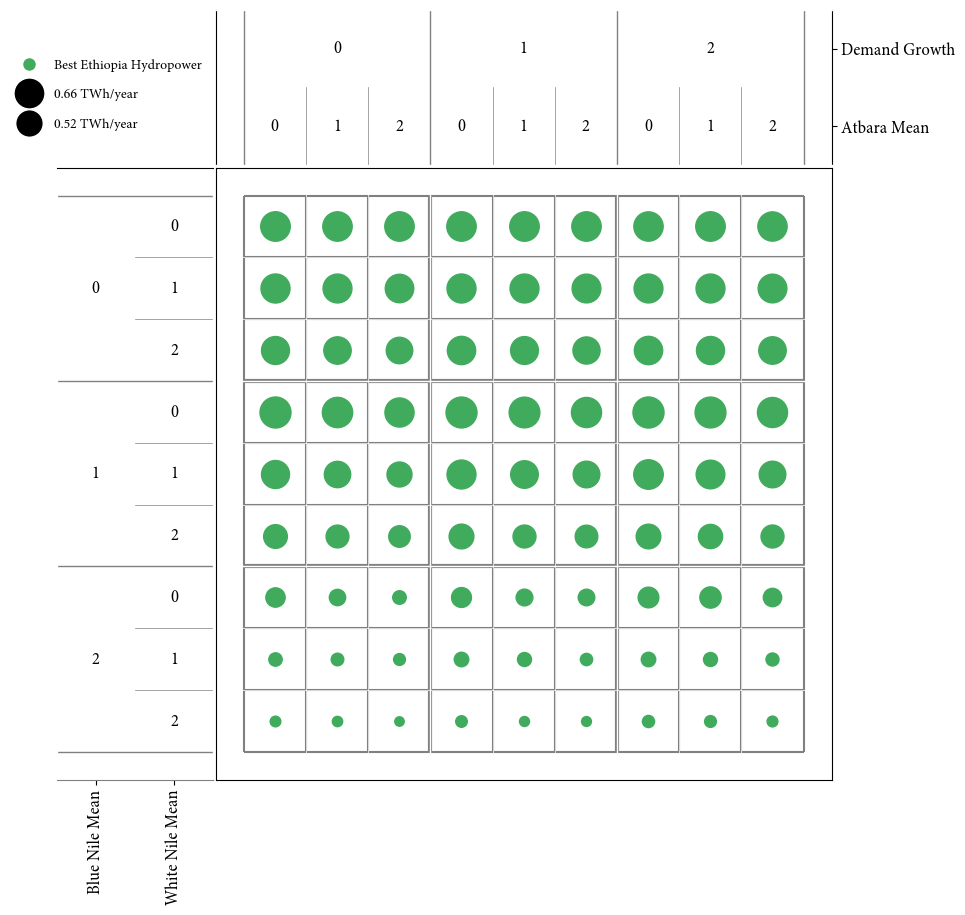

6it [00:15,  2.54s/it]


In [95]:
pivot_rows = ["Blue Nile Mean", "White Nile Mean"]
pivot_columns = ["Demand Growth", "Atbara Mean"]

policy_colors = {
    "Best Egypt 90$^{th}$": "#0195fb",
    "Best Egypt HAD": "#6C0C86",
    "Compromise: Absolute": "orchid",
    "Best Ethiopia Hydropower": "#41ab5d",
    "Best Egypt Irr.": "#fdaa09",
    "Compromise: Percentile": "chocolate",
}
units = ["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year"]

for u, obj in tqdm(enumerate(outcomes.iloc[:, :-2].columns)):
    print("------------")
    print(obj)
    print("------------\n")
    pvt_policy_names = pd.pivot_table(
            best_performer_df.loc[:,pivot_rows+pivot_columns+[obj]],
            values=obj,
            index=pivot_rows,
            columns=pivot_columns,
            aggfunc=lambda x: statistics.mode(x),
            dropna=False
        )
    
    best_performer_df[f"scenario_box_best_{obj}"] = range(5000)
    for i in range(5000):
        best_performer_df.loc[i,f"scenario_box_best_{obj}"] = pvt_policy_names.loc[
            (best_performer_df.loc[i,"Blue Nile Mean"],best_performer_df.loc[i,"White Nile Mean"]),
            (best_performer_df.loc[i,"Demand Growth"],best_performer_df.loc[i,"Atbara Mean"])
        ]
        if best_performer_df.loc[i,obj] != best_performer_df.loc[i,f"scenario_box_best_{obj}"]:
            best_performer_df.loc[i,f"{obj}_improvement"] = None
            
    pvt_improvement = pd.pivot_table(
        best_performer_df.loc[:,pivot_rows+pivot_columns+[f"{obj}_improvement"]],
        values=f"{obj}_improvement",
        index=pivot_rows,
        columns=pivot_columns,
        aggfunc=lambda x: x.mean(),
        dropna=False
    )
    
    plot_policy_shift_scenarios(pvt_policy_names, pvt_improvement, units[u])
    plt.show()


old x:
      atbara_mean_coef  blue_nile_mean_coef  white_nile_mean_coef  \
0                 0.80                 1.11                  0.98   
1                 1.03                 0.94                  0.87   
2                 0.79                 1.24                  1.22   
3                 0.98                 1.17                  1.20   
4                 1.21                 0.96                  1.05   
...                ...                  ...                   ...   
4995              0.93                 0.96                  1.04   
4996              1.05                 1.08                  1.08   
4997              1.12                 0.97                  0.76   
4998              1.15                 0.97                  1.08   
4999              1.07                 0.79                  0.90   

      yearly_demand_growth_rate  
0                          0.02  
1                          0.02  
2                          0.02  
3                          0

<ipython-input-26-abae1a6148a9>:49: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


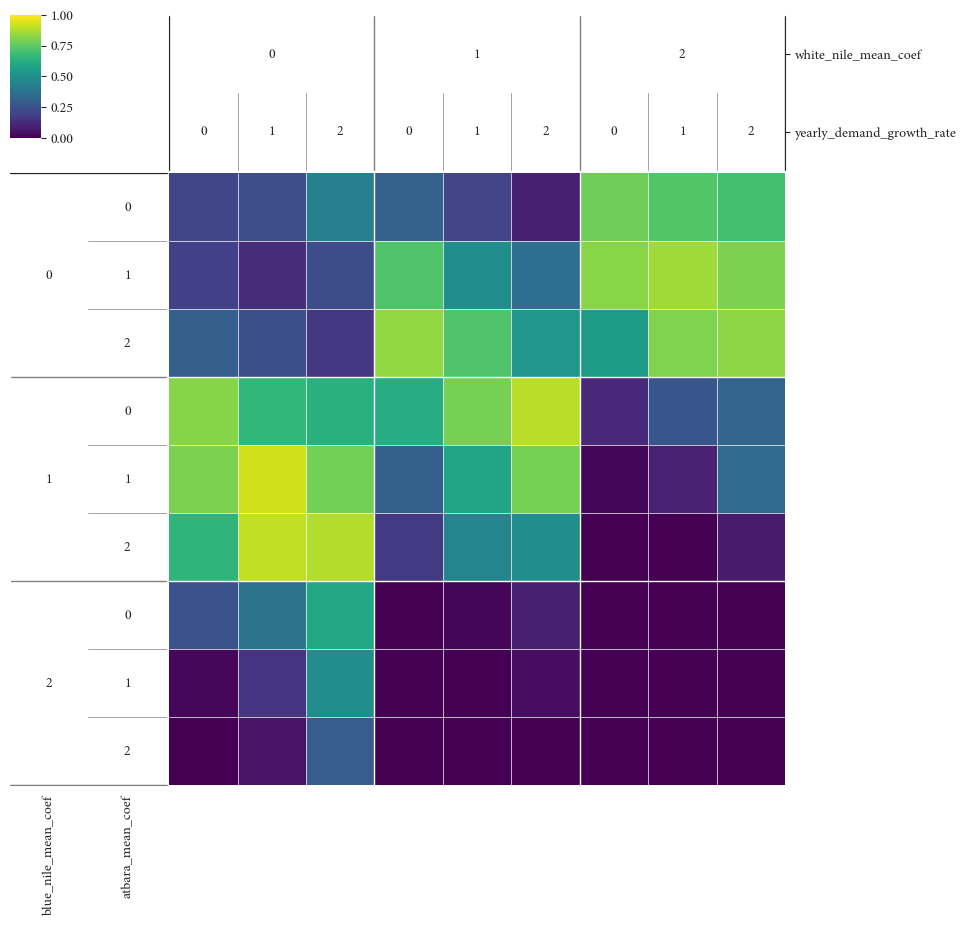

In [27]:
obj = "egypt_low_had"
x = experiments.iloc[:5000, [1,3,5,6]]
y = outcomes.loc[outcomes["policy"] == "best_ethiopia",obj].reset_index(drop=True) > outcomes.loc[outcomes["policy"] == "compromise_percentile",obj].reset_index(drop=True)
fig, x_y, pvt, discretized_x, x = create_pivot_plot_new(x, y, 2, nbins=3)
plt.show()

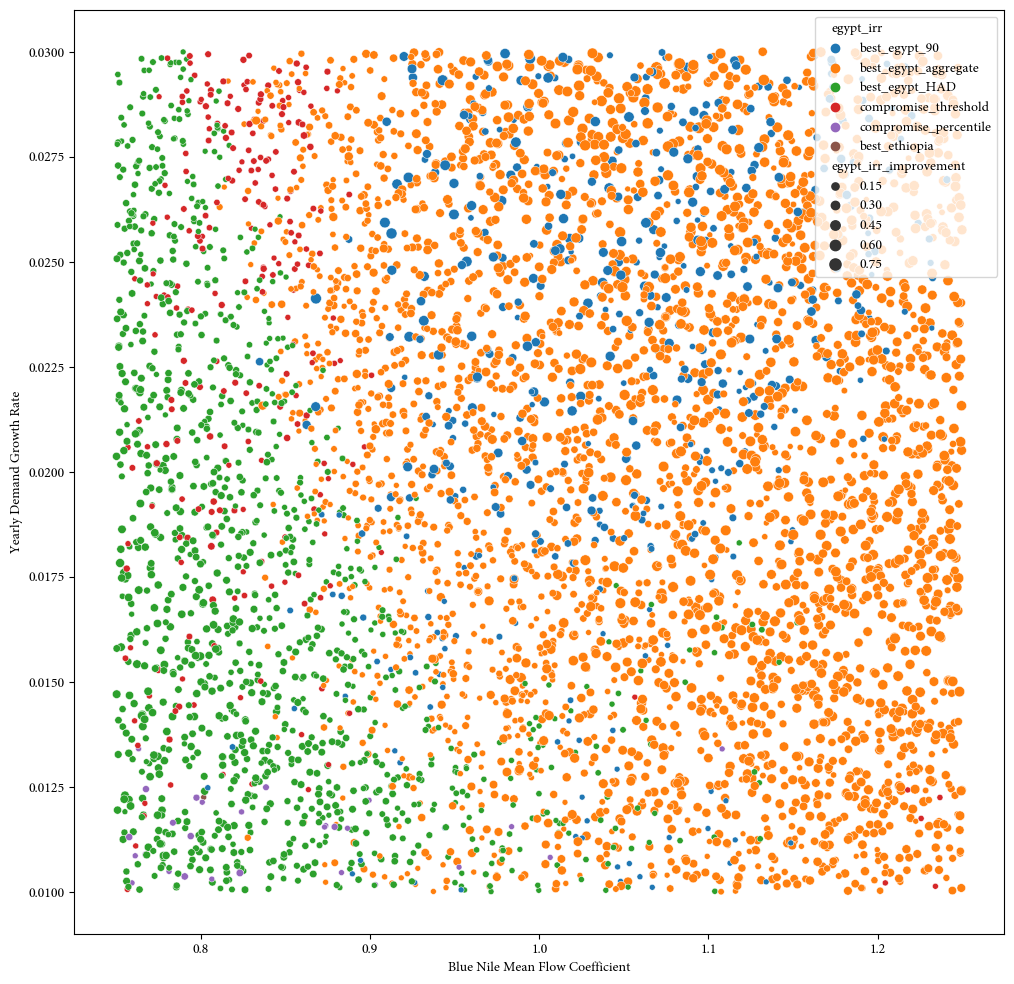

In [183]:
obj="egypt_irr"
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data = best_performer_df[best_performer_df[f"{obj}_improvement"]>0],
                x= "Blue Nile Mean Flow Coefficient",
                y= "Yearly Demand Growth Rate", 
                hue=obj,
                size=f"{obj}_improvement",
                ax=ax)
plt.show()

5000it [00:23, 210.52it/s]


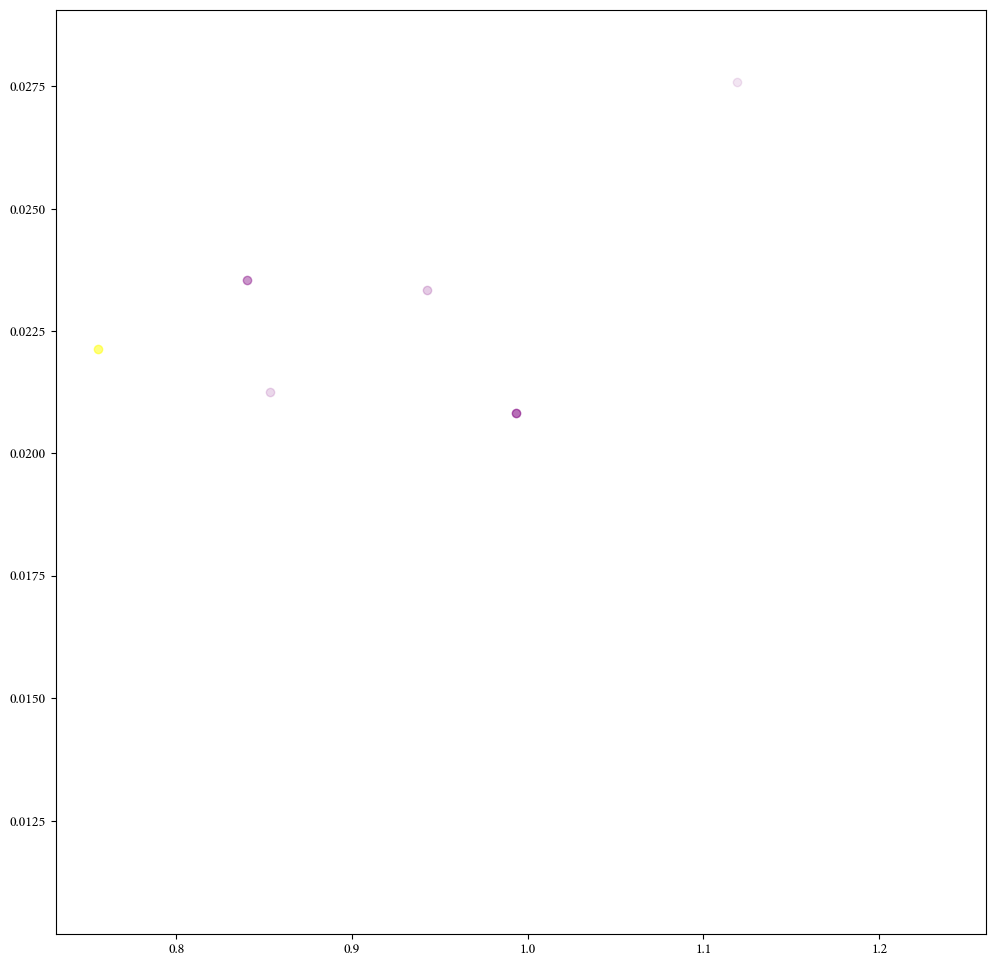

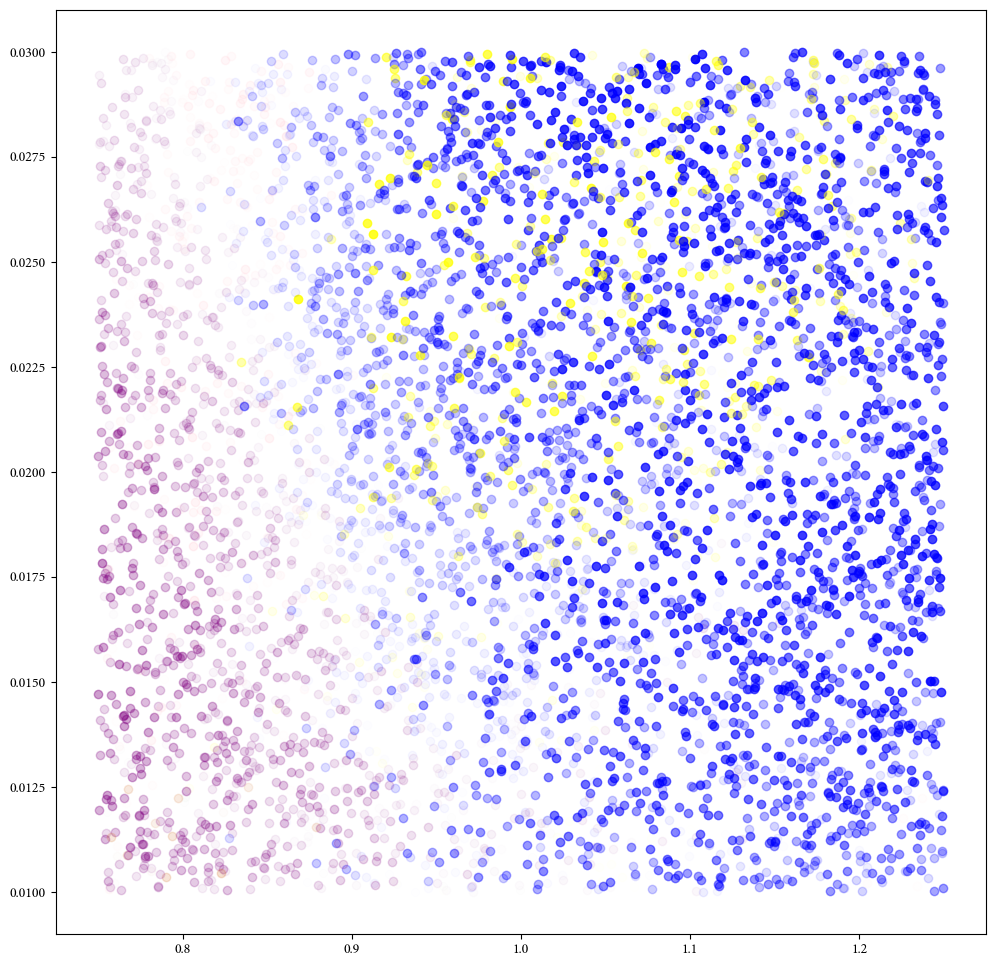

In [193]:
color_dict = {"best_egypt_90":"yellow","best_egypt_aggregate":"blue","best_egypt_HAD":"purple","compromise_threshold":"pink","compromise_percentile":"chocolate","best_ethiopia":"green"}
obj="egypt_irr"
best_imp = best_performer_df[f"{obj}_improvement"].max()
fig, ax = plt.subplots(figsize=(12,12))

for _, row in tqdm(best_performer_df.iterrows()):
    ax.scatter(#data = row,
                    x= row["Blue Nile Mean Flow Coefficient"],
                    y= row["Yearly Demand Growth Rate"], 
                    label=row[obj],
                    alpha=row[f"{obj}_improvement"]*(1/best_imp),
                    color=color_dict[row[obj]])
                    #ax=ax)
plt.show()